# Putting all data together

In [7]:
import pandas as pd
from get_feature_sets import get_feature_sets, get_snow_ice_cover_classification

collocation_data_path = "./collocation_database/merged_collocations.csv"
collocation_df = pd.read_csv(collocation_data_path)
# display(collocation_df.head())

caliop_cloud_phase = get_feature_sets("caliop_cloud_phase", "./test_data_first_feb_week/CALIOP/", collocation_data_path)
caliop_cloud_phase.head()

modis_ir_cloud_phase = get_feature_sets("modis_infrared_cloud_phase", "./test_data_first_feb_week/MODIS/", collocation_data_path)
modis_ir_cloud_phase.head()

modis_optical_cloud_phase = get_feature_sets("modis_optical_cloud_phase", "./test_data_first_feb_week/MODIS/", collocation_data_path)
modis_optical_cloud_phase.head()

modis_radiances = get_feature_sets("modis_radiances", "./test_data_first_feb_week/L1_MODIS/", collocation_data_path)
modis_radiances.head()

modis_surface_temperature = get_feature_sets("modis_surface_temp", "./test_data_first_feb_week/MODIS_surface_temp/", collocation_data_path)
modis_surface_temperature.head()

modis_geo = get_feature_sets("modis_geo", "./test_data_first_feb_week/MODIS/", collocation_data_path)
modis_geo.head()

L3_land_cover_folder = "./test_data/other_MODIS"
snow_ice_cover = get_snow_ice_cover_classification(L3_land_cover_folder, modis_geo.mLong, modis_geo.mLat, 2017)

modis_geo["mSnowIceCover"] = snow_ice_cover
print(sum(snow_ice_cover == 1))
modis_geo.head()

  0%|          | 0/73 [00:00<?, ?it/s]

100%|██████████| 93/93 [00:01<00:00, 69.53it/s]

./test_data/other_MODIS/MCD12C1.A2017001.061.2022168170603.hdf
10597


,,mLong,mLat,mVZA,mSZA,mSnowIceCover
pixel_id,fileID,,,,,
23633,A2017032.0500,-14.130672,76.058746,3.59,114.04,0
23903,A2017032.0500,-14.248881,76.023499,3.61,114.08,0
24173,A2017032.0500,-14.364159,75.987602,3.60,114.12,0
24443,A2017032.0500,-14.480899,75.953590,3.60,114.16,0
24713,A2017032.0500,-14.595055,75.917595,3.59,114.20,0


In [267]:
import numpy as np

modis_training_features = pd.merge(modis_radiances, modis_geo, on=["fileID", "pixel_id"]).rename(columns={"fileID": "mFileID"})

# get rid of rows with duplicate indices
modis_training_features = modis_training_features[~modis_training_features.index.duplicated(keep='first')]

# # print the head of the dataframe for the first four higher level indices
# for i in range(4):
#     unique_fileIDs = np.unique([index[0] for index in modis_training_features.index])
#     fileID = unique_fileIDs[i]
#     print(fileID)
#     display(modis_training_features.loc[fileID].head())

modis_training_features.reset_index().head(10)


,fileID,pixel_id,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,...,band_32,band_33,band_34,band_35,band_36,mLong,mLat,mVZA,mSZA,mSnowIceCover
0,A2017032.0500,23633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.115158,3.434360,2.986960,2.652417,2.064158,-14.130672,76.058746,3.59,114.04,0
1,A2017032.0500,23903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.053490,3.401830,2.972497,2.636331,2.053721,-14.248881,76.023499,3.61,114.08,0
2,A2017032.0500,24173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.078043,3.411537,3.021309,2.682820,2.066055,-14.364159,75.987602,3.60,114.12,0
3,A2017032.0500,24443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.983257,3.338607,2.944174,2.637038,2.055856,-14.480899,75.953590,3.60,114.16,0
4,A2017032.0500,24713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.956420,3.324703,2.927502,2.594615,2.049215,-14.595055,75.917595,3.59,114.20,0
5,A2017032.0500,24983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.042641,3.392911,2.983746,2.644993,2.043048,-14.711120,75.882156,3.61,114.24,0
6,A2017032.0500,25253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.093460,3.424916,3.005842,2.670447,2.085505,-14.824141,75.846046,3.60,114.29,0
7,A2017032.0500,25523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.232213,3.519095,3.046418,2.706860,2.078033,-14.938507,75.811943,3.60,114.32,0
8,A2017032.0500,25793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.137998,3.459282,3.005440,2.677164,2.054433,-15.050442,75.775734,3.59,114.37,0
9,A2017032.0500,26063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.979831,3.347526,2.938751,2.625372,2.033797,-15.164192,75.740150,3.61,114.41,0


(14869, 38)
(10701, 37)
(9879, 35)
(9650, 33)


<Axes: >

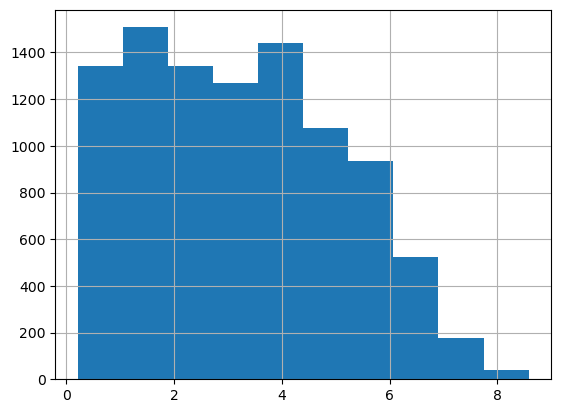

In [236]:
# join modis features into a single dataframe
modis_features_all_day = pd.concat([modis_ir_cloud_phase, modis_radiances, modis_surface_temperature, modis_geo], axis=1).reset_index()
modis_features_all_day.head()

# combine collocation_database with modis_infrared_phase by matching the pixel_id and mFileID columns with pixel_id and fileID columns
merged_df = pd.merge(collocation_df, modis_features_all_day, how="left", left_on=["pixel_id", "mFileID"], right_on=["pixel_id", "fileID"])
merged_df.drop(columns=["fileID"], inplace=True)
merged_df.head()

# combine collocation_df with caliop_cloud_phase by matching the profile_id and cFileID columns with profile_id and fileID columns
merged_df = pd.merge(merged_df, caliop_cloud_phase, how="left", left_on=["profile_id", "cFileID"], right_on=["profile_id", "fileID"])
# merged_df.drop(columns=["fileID"], inplace=True)
merged_df.head()

# make profile_id and cFileID the index
merged_df.set_index(["profile_id", "cFileID"], inplace=True)

# for the all-day dataset, the bands 1-19 are empty, so we can drop them
# make a list of the columns to drop
drop_columns = ["band_" + str(i) for i in range(1, 20)]

# for bands 13 and 14 there are two bands for each, 13lo, 13hi, 14lo, 14hi, so add those to the list while removing the 13 and 14 entires
drop_columns += ["band_13lo", "band_13hi", "band_14lo", "band_14hi"]
drop_columns.remove("band_13")
drop_columns.remove("band_14")

# band 26 is also useless
drop_columns.append("band_26")

# drop the colummns
merged_df.drop(columns=drop_columns, inplace=True)
merged_df.head()
print(merged_df.shape)

# drop all rows that do not have Snow/Ice cover
merged_df = merged_df[merged_df.mSnowIceCover == 1].drop(columns=["mSnowIceCover"])
print(merged_df.shape)

# drop all rows that are not aerosol free or that are invalid
merged_df = merged_df[(merged_df.cAerosolFree == 1) & (merged_df.cInvalid == 0)].drop(columns=["cAerosolFree", "cInvalid"])
print(merged_df.shape)

# drop all rows that have an unknown cloud phase
merged_df = merged_df[merged_df.cUnknown == 0].drop(columns=["cUnknown", "cPhaseHighQA"])
print(merged_df.shape)

merged_df.drop(columns=[col for col in merged_df.columns if "band" in col]).describe()

# plot a histogram of mVZA
merged_df.mVZA.hist()

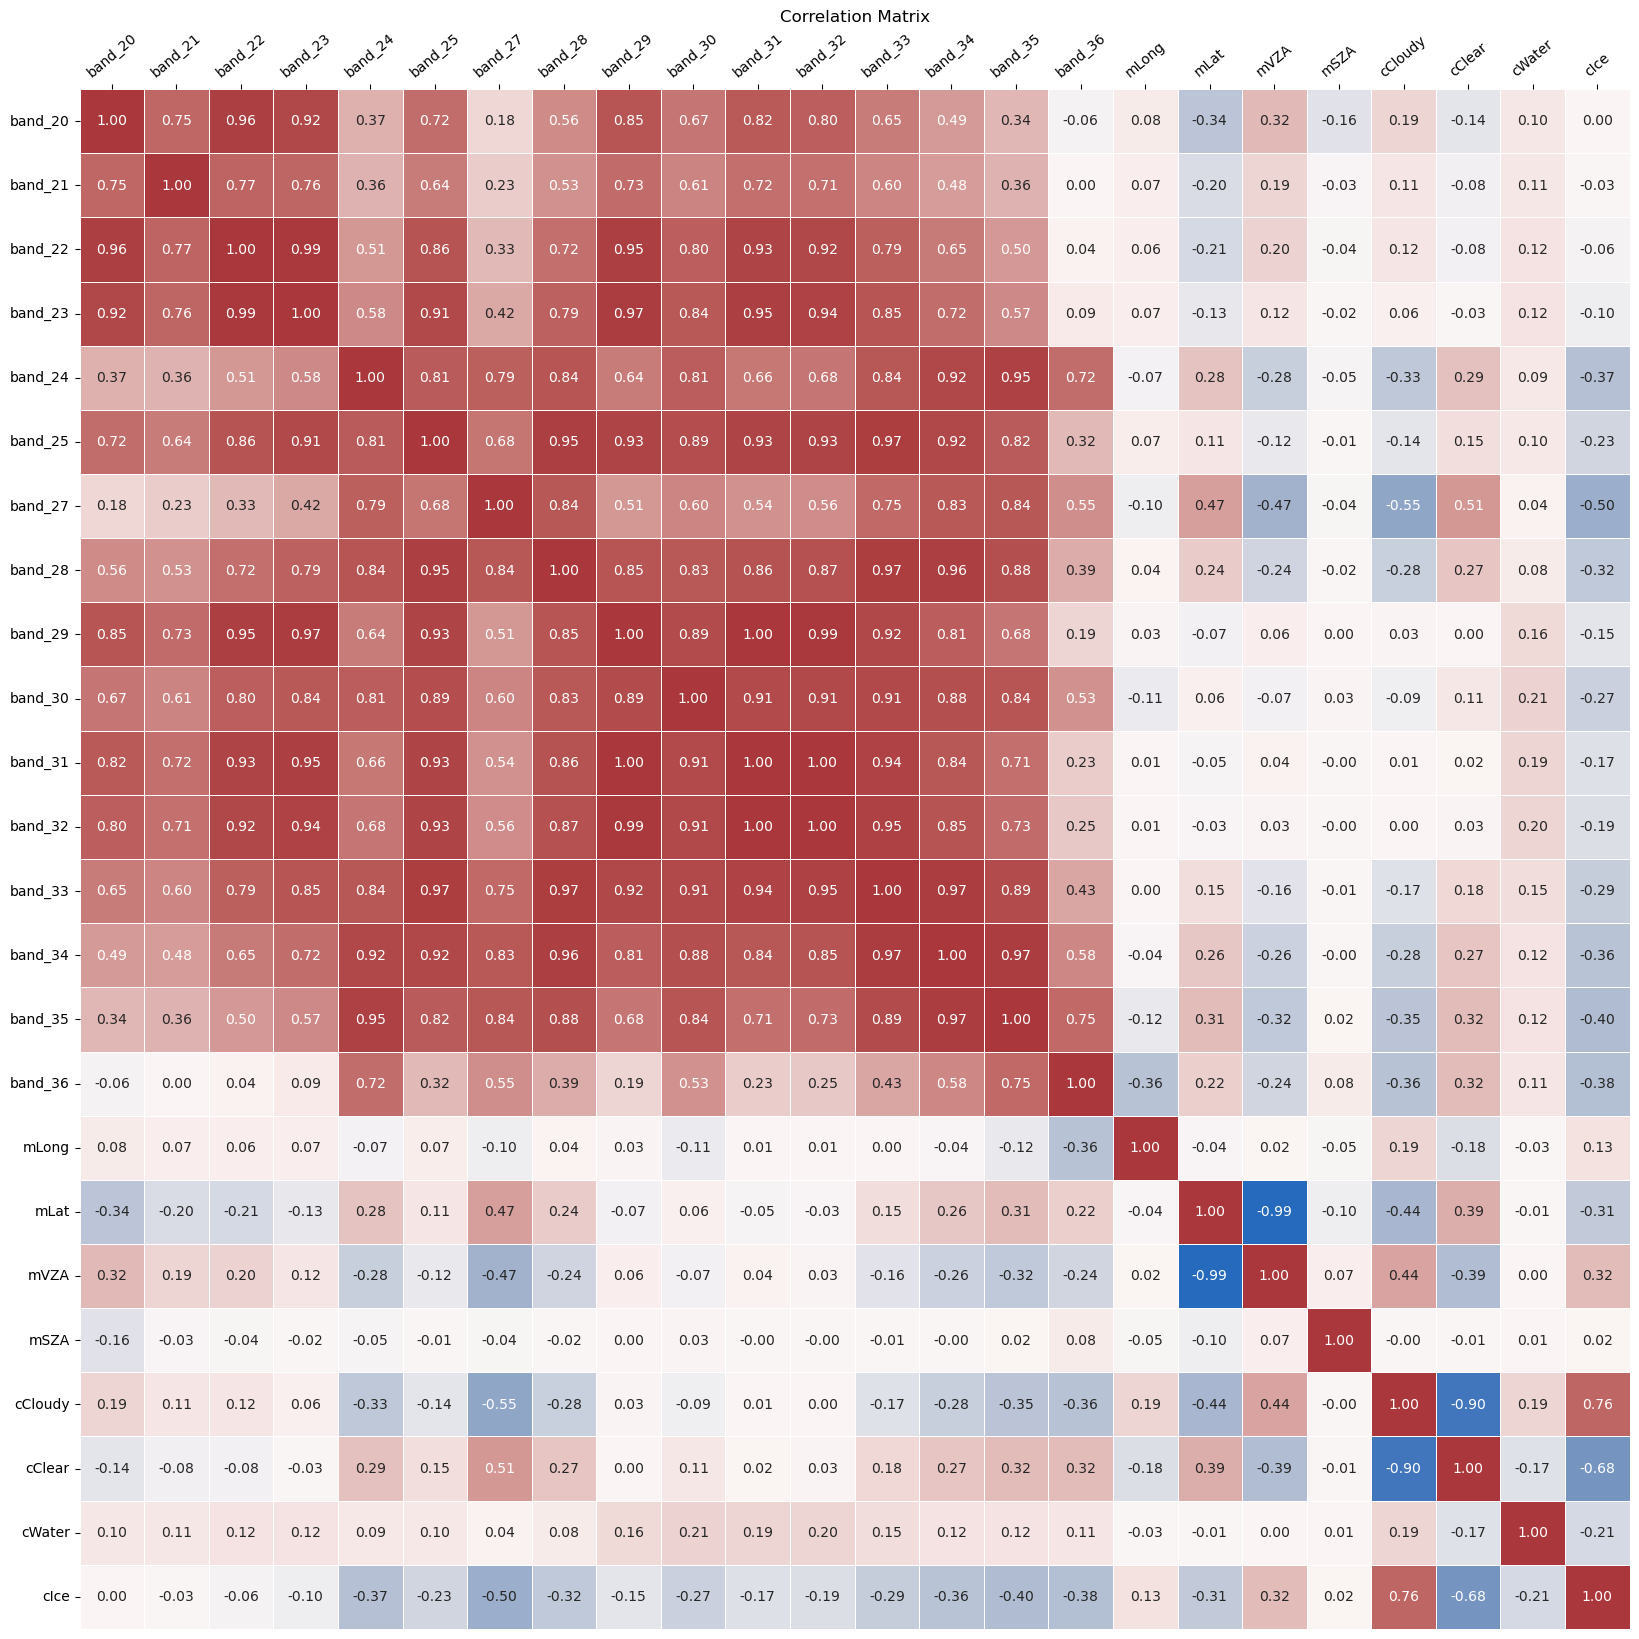

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# calculate the correlation matrix while dropping the pixel_id, mFileID, and all other cloud classification columns starting with m
corr_table = merged_df.drop(columns=["pixel_id", "mFileID", "mCloudy", "mClear", "mWater", "mIce", "mUndetermined", "mDayPixel", "surface_temp"]).corr()
# display(corr_table)

fig, ax = plt.subplots(figsize=(20, 20))
cax = sns.heatmap(corr_table.T, cmap="vlag", annot=True, fmt=".2f", linewidths=.5, ax=ax, cbar=False, vmin=-1, vmax=1)
# set colorbar
# cbar = cax.figure.colorbar(cax.collections[0], ax=cax, location="right")

# Set plot labels
ax.set_title("Correlation Matrix")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.xaxis.tick_top()  # Place x-axis labels on top
# set the angle of the x-axis labels to diagonal
plt.xticks(rotation=40)
# Show the plot
plt.show()

# save figure
fig.savefig("correlation_matrix.png")

In [86]:
# print how many entries are not cCloudy but are also not cClear
print(merged_df[(merged_df.cCloudy == 0) & (merged_df.cClear == 0)].shape)

(485, 33)


# Cloudy/clear classification with Logistic Regression

## First try

In [228]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# make a list of non-predictor columns
# non_predictor_columns = ["pixel_id", "mFileID", "mCloudy", "mClear", "mWater", "mIce", "mUndetermined", "mDayPixel", "surface_temp", "cClear", "cCloudy", "cIce","cWater"]
non_predictor_columns = ["pixel_id", "mFileID", "surface_temp", "cClear", "cCloudy", "cIce","cWater"]

# predictor variables
X = merged_df.drop(columns=non_predictor_columns).values.astype(float)

# target variable
y = merged_df["cCloudy"].values

# scale the features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Split the dataset into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

# do k-fold cross validation with k=10 on the training set, making sure that the score is the accuracy score
clf = LogisticRegression(random_state=1, max_iter=10000, penalty="l1", solver="saga", C=2)

clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
# print(classification_report(y_test, y_pred))
confusion_matrix_log_reg = confusion_matrix(y_test, y_pred)
TP = confusion_matrix_log_reg[1, 1]
TN = confusion_matrix_log_reg[0, 0]
FP = confusion_matrix_log_reg[0, 1]
FN = confusion_matrix_log_reg[1, 0]

TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

# balanced accuracy
BACC = balanced_accuracy_score(y_test, y_pred)
print("Balanced accuracy: ", BACC)

print("Test True Positive Rate: ", TPR)
print("Test False Positive Rate: ", FPR)
print("Overall test accuracy: ", ACC)

# display regression coefficients
coefficients = pd.DataFrame(clf.coef_, columns=merged_df.drop(columns=non_predictor_columns).columns)
coefficients = coefficients.T
coefficients.columns = ["Coefficient"]
coefficients["Abs_Coefficient"] = coefficients.Coefficient.abs()
coefficients = coefficients.sort_values("Abs_Coefficient", ascending=False)
print(coefficients)

Balanced accuracy:  0.8562736449256427
Test True Positive Rate:  0.8834269662921348
Test False Positive Rate:  0.17087967644084934
Overall test accuracy:  0.8611686697057604
               Coefficient  Abs_Coefficient
band_32          10.247946        10.247946
band_31          -8.760235         8.760235
band_33          -4.547329         4.547329
band_34          -4.391930         4.391930
band_22          -4.024053         4.024053
band_29           3.967279         3.967279
band_25           3.658030         3.658030
band_27          -3.294693         3.294693
band_28           2.319647         2.319647
band_35          -1.807473         1.807473
band_30           1.270834         1.270834
band_24           1.197445         1.197445
mUndetermined     0.901867         0.901867
mWater            0.693822         0.693822
band_36          -0.685895         0.685895
band_20           0.480734         0.480734
mVZA              0.404271         0.404271
mDayPixel         0.349139        

## Try lasso by trying many regularization strength values

### Prepare data and run model

In [230]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import numpy as np

# make a list of non-predictor columns
# non_predictor_columns = ["pixel_id", "mFileID", "mCloudy", "mClear", "mWater", "mIce", "mUndetermined", "mDayPixel", "surface_temp", "cClear", "cCloudy", "cIce","cWater"]
non_predictor_columns = ["pixel_id", "mFileID", "surface_temp", "cClear", "cCloudy", "cIce","cWater"]

# predictor variables
X = merged_df.drop(columns=non_predictor_columns).values.astype(np.float64)

# target variable
y = merged_df["cCloudy"].values

# scale the features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Split the dataset into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

Cs = 10**np.linspace(-2, 2, 50)

# create a Logistic Regression model with both L1 and L2 penalties
cv = KFold(n_splits=10, random_state=1, shuffle=True)
clf = LogisticRegressionCV(Cs=Cs, random_state=1, max_iter=10000, penalty="l1", solver="saga", cv=cv, n_jobs=4, scoring="balanced_accuracy")
clf = clf.fit(x_train, y_train)



### Prepare and show stats

               Coefficient  Abs_Coefficient
band_32          14.150656        14.150656
band_31         -13.868968        13.868968
band_29           5.914312         5.914312
band_33          -5.462481         5.462481
band_34          -4.310743         4.310743
band_22          -4.160593         4.160593
band_25           3.910228         3.910228
band_27          -3.319812         3.319812
band_28           2.405303         2.405303
band_35          -1.777561         1.777561
band_30           1.346889         1.346889
band_24           1.202893         1.202893
mWater            0.915177         0.915177
mUndetermined     0.896155         0.896155
band_36          -0.699809         0.699809
band_20           0.652179         0.652179
mDayPixel         0.530764         0.530764
mVZA              0.490895         0.490895
band_23          -0.385491         0.385491
mLong             0.243564         0.243564
mLat              0.147802         0.147802
mSZA              0.027794      

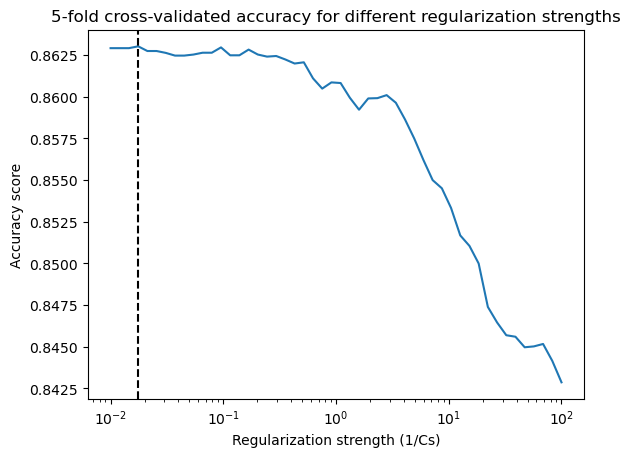

[56.89866029]
Balanced accuracy:  0.8573270157121595
Test True Positive Rate:  0.8855337078651685
Test False Positive Rate:  0.17087967644084934
Overall test accuracy:  0.8573270157121595


In [231]:
# display regression coefficients
coefficients = pd.DataFrame(clf.coef_, columns=merged_df.drop(columns=non_predictor_columns).columns)
coefficients = coefficients.T
coefficients.columns = ["Coefficient"]
coefficients["Abs_Coefficient"] = coefficients.Coefficient.abs()
coefficients = coefficients.sort_values("Abs_Coefficient", ascending=False)
print(coefficients)

fold_averaged_scores = clf.scores_[1].mean(axis=0)
regularization_strengths = 1 / Cs
# plot with log scale for regularization strength
plt.xscale("log")
plt.plot(regularization_strengths, fold_averaged_scores)
plt.xlabel("Regularization strength (1/Cs)")
plt.ylabel("Accuracy score")
plt.title("5-fold cross-validated accuracy for different regularization strengths")
# plot the best regularization strength as a vertical dashed line
plt.axvline(1/clf.C_[0], color="black", linestyle="--")
plt.show()
print(clf.C_)

y_pred = clf.predict(x_test)

confusion_matrix_log_reg = confusion_matrix(y_test, y_pred)
TP = confusion_matrix_log_reg[1, 1]
TN = confusion_matrix_log_reg[0, 0]
FP = confusion_matrix_log_reg[0, 1]
FN = confusion_matrix_log_reg[1, 0]

TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

# balanced accuracy
BACC = balanced_accuracy_score(y_test, y_pred)
print("Balanced accuracy: ", BACC)

# write ACC in terms of TPR and FPR
ACC = (TPR + (1 - FPR)) / 2

print("Test True Positive Rate: ", TPR)
print("Test False Positive Rate: ", FPR)
print("Overall test accuracy: ", ACC)

## Compare to simple logistic regression again

In [232]:
# compare to results for fitting with no penalty
no_penalty_log_reg = LogisticRegression(random_state=1, max_iter=10000, penalty="none", solver="saga")
no_penalty_log_reg = no_penalty_log_reg.fit(x_train, y_train)

y_pred = no_penalty_log_reg.predict(x_test)

confusion_matrix_log_reg = confusion_matrix(y_test, y_pred)
TP = confusion_matrix_log_reg[1, 1]
TN = confusion_matrix_log_reg[0, 0]
FP = confusion_matrix_log_reg[0, 1]
FN = confusion_matrix_log_reg[1, 0]

TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

# balanced accuracy
BACC = balanced_accuracy_score(y_test, y_pred)
print("Balanced accuracy: ", BACC)


print("Test True Positive Rate: ", TPR)
print("Test False Positive Rate: ", FPR)
print("Overall test accuracy: ", ACC)

# display regression coefficients
coefficients = pd.DataFrame(no_penalty_log_reg.coef_, columns=merged_df.drop(columns=non_predictor_columns).columns)
coefficients = coefficients.T
coefficients.columns = ["Coefficient"]
coefficients["Abs_Coefficient"] = coefficients.Coefficient.abs()
coefficients = coefficients.sort_values("Abs_Coefficient", ascending=False)
print(coefficients)


/Users/alexandrudobra/anaconda3/envs/MPhys/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Balanced accuracy:  0.8568214545392576
Test True Positive Rate:  0.8855337078651685
Test False Positive Rate:  0.1718907987866532
Overall test accuracy:  0.8619975134687111
               Coefficient  Abs_Coefficient
band_32          14.563999        14.563999
band_31         -14.375487        14.375487
band_29           6.090521         6.090521
band_33          -5.585931         5.585931
band_34          -4.282380         4.282380
band_22          -4.171362         4.171362
band_25           3.930275         3.930275
band_27          -3.319383         3.319383
band_28           2.402771         2.402771
band_35          -1.757728         1.757728
band_30           1.350644         1.350644
band_24           1.202996         1.202996
mWater            1.060904         1.060904
band_36          -0.708677         0.708677
mDayPixel         0.706346         0.706346
band_20           0.652611         0.652611
mUndetermined     0.509393         0.509393
mVZA              0.483752         

## Try ridge: L2 penalty

In [234]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import numpy as np

# make a list of non-predictor columns
# non_predictor_columns = ["pixel_id", "mFileID", "mCloudy", "mClear", "mWater", "mIce", "mUndetermined", "mDayPixel", "surface_temp", "cClear", "cCloudy", "cIce","cWater"]
non_predictor_columns = ["pixel_id", "mFileID", "surface_temp", "cClear", "cCloudy", "cIce","cWater"]

# predictor variables
X = merged_df.drop(columns=non_predictor_columns).values.astype(np.float64)

# target variable
y = merged_df["cCloudy"].values

# scale the features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Split the dataset into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

Cs = 10**np.linspace(-2, 2, 50)

# create a Logistic Regression model with both L1 and L2 penalties
cv = KFold(n_splits=10, random_state=1, shuffle=True)
clf = LogisticRegressionCV(Cs=Cs, random_state=1, max_iter=10000, penalty="l2", cv=cv, n_jobs=4)
clf = clf.fit(x_train, y_train)

416118.76s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
416118.77s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
416118.79s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
416118.81s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - to python to disable frozen modules.
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - Note: Debugging will proceed. Set PYDEVD

               Coefficient  Abs_Coefficient
band_32          14.098353        14.098353
band_31         -13.946256        13.946256
band_29           6.010544         6.010544
band_33          -5.383949         5.383949
band_34          -4.294059         4.294059
band_22          -4.094119         4.094119
band_25           3.882652         3.882652
band_27          -3.309170         3.309170
band_28           2.367376         2.367376
band_35          -1.779482         1.779482
band_30           1.341634         1.341634
band_24           1.201924         1.201924
mWater            0.926378         0.926378
band_36          -0.701749         0.701749
mDayPixel         0.625558         0.625558
band_20           0.624744         0.624744
mUndetermined     0.522140         0.522140
mVZA              0.485805         0.485805
mIce             -0.422945         0.422945
band_23          -0.416365         0.416365
mCloudy           0.247432         0.247432
mClear           -0.247432      

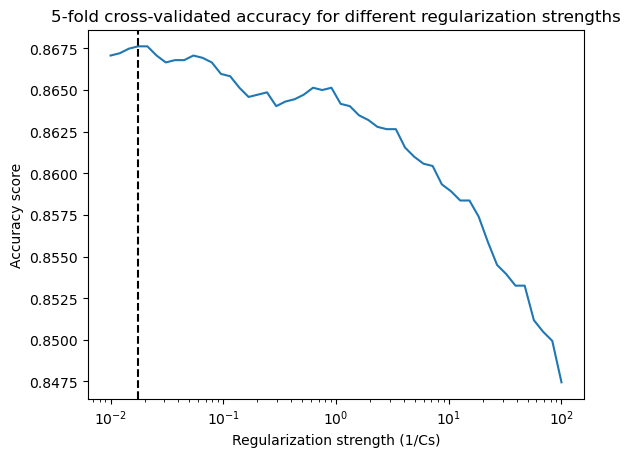

[56.89866029]
Balanced accuracy:  0.8573270157121595
Test True Positive Rate:  0.8855337078651685
Test False Positive Rate:  0.17087967644084934
Overall test accuracy:  0.8624119353501865


In [235]:
# display regression coefficients
coefficients = pd.DataFrame(clf.coef_, columns=merged_df.drop(columns=non_predictor_columns).columns)
coefficients = coefficients.T
coefficients.columns = ["Coefficient"]
coefficients["Abs_Coefficient"] = coefficients.Coefficient.abs()
coefficients = coefficients.sort_values("Abs_Coefficient", ascending=False)
print(coefficients)

fold_averaged_scores = clf.scores_[1].mean(axis=0)
regularization_strengths = 1 / Cs
# plot with log scale for regularization strength
plt.xscale("log")
plt.plot(regularization_strengths, fold_averaged_scores)
plt.xlabel("Regularization strength (1/Cs)")
plt.ylabel("Accuracy score")
plt.title("5-fold cross-validated accuracy for different regularization strengths")
# plot the best regularization strength as a vertical dashed line
plt.axvline(1/clf.C_[0], color="black", linestyle="--")
plt.show()
print(clf.C_)

y_pred = clf.predict(x_test)

confusion_matrix_log_reg = confusion_matrix(y_test, y_pred)
TP = confusion_matrix_log_reg[1, 1]
TN = confusion_matrix_log_reg[0, 0]
FP = confusion_matrix_log_reg[0, 1]
FN = confusion_matrix_log_reg[1, 0]

TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

# balanced accuracy
BACC = balanced_accuracy_score(y_test, y_pred)
print("Balanced accuracy: ", BACC)


print("Test True Positive Rate: ", TPR)
print("Test False Positive Rate: ", FPR)
print("Overall test accuracy: ", ACC)

# Try data from 2013-2017

## Read data

In [4]:
import numpy as np
import pandas as pd


folder = "./JASMIN_tests/merged_features_2013_2017_complete/"

collocation_df = pd.read_csv(folder + "merged_collocations.csv")
modis_training_features = pd.read_csv(folder + "modis_training_features.csv")
caliop_labels = pd.read_csv(folder + "caliop_labels.csv")
modis_infrared_phase = pd.read_csv(folder + "modis_infrared_cloud_phase.csv")
modis_optical_phase = pd.read_csv(folder + "modis_optical_cloud_phase.csv")

print("Collocation database", collocation_df.shape)
print(collocation_df.head())

print("MODIS training features", modis_training_features.shape)
print(modis_training_features.head())

print("CALIOP labels", caliop_labels.shape)
print(caliop_labels.head())

print("MODIS infrared phase", modis_infrared_phase.shape)
print(modis_infrared_phase.head())

print("MODIS optical phase", modis_optical_phase.shape)
print(modis_optical_phase.head())

Collocation database (3172366, 4)
   profile_id  pixel_id        mFileID              cFileID
0       39585     23633  A2017032.0500  2017-02-01T04-57-07
1       39600     23903  A2017032.0500  2017-02-01T04-57-07
2       39615     24173  A2017032.0500  2017-02-01T04-57-07
3       39630     24443  A2017032.0500  2017-02-01T04-57-07
4       39645     24713  A2017032.0500  2017-02-01T04-57-07
MODIS training features (3155701, 46)
          fileID  pixel_id  band_20  band_21  band_22  band_23  band_24  \
0  A2017032.0500     23633   0.0446   0.0915   0.0693   0.0838   0.0520   
1  A2017032.0500     23903   0.0407   0.0811   0.0659   0.0784   0.0488   
2  A2017032.0500     24173   0.0410   0.0361   0.0657   0.0792   0.0497   
3  A2017032.0500     24443   0.0405   0.0811   0.0659   0.0792   0.0498   
4  A2017032.0500     24713   0.0380   0.0361   0.0602   0.0708   0.0476   

   band_25  band_27  band_28  ...  band_18  band_19  band_26    mLong  \
0   0.1215   0.9788   1.8074  ...      NaN  

## Clean up data

In [2]:
collocations_with_caliop_labels = pd.merge(collocation_df, caliop_labels.rename(columns={"fileID": "cFileID"}), on=["cFileID", "profile_id"], how="inner")
features_with_caliop_labels = pd.merge(collocations_with_caliop_labels, modis_training_features.rename(columns={"fileID": "mFileID"}), on=["mFileID", "pixel_id"], how="inner")

del collocations_with_caliop_labels

# algorithm = "infrared"
algorithm = "optical"

# merge features_with_caliop_labels with the phase as classified by the chosen algorithm
if algorithm == "infrared":
    all_features = pd.merge(features_with_caliop_labels, modis_infrared_phase.rename(columns={"fileID": "mFileID"}), on=["mFileID", "pixel_id"], how="inner")
elif algorithm == "optical":
    all_features = pd.merge(features_with_caliop_labels, modis_optical_phase.rename(columns={"fileID": "mFileID"}), on=["mFileID", "pixel_id"], how="inner")

# remove all rows that have duplicates in the pair (pixel_id, mFileID)
all_features.drop_duplicates(subset=["pixel_id", "mFileID"], inplace=True)
print(f"All features with MODIS {algorithm} phase and CALIOP labels", all_features.shape)

# delete rows with cInvalid == 1 or cAerosolFree == 0
all_features = all_features[(all_features.cInvalid == 0) & (all_features.cAerosolFree == 1)].drop(columns=["cInvalid", "cAerosolFree"])
print("Only keep valid and aerosol free profiles", all_features.shape)

# delete rows with cUnknown == 1
all_features = all_features[all_features.cUnknown == 0].drop(columns=["cUnknown"])
print("Only keep known phase classifications", all_features.shape)

# are there data points with both cCloudy and cClear set to 0?
all_features = all_features[(all_features.cCloudyHighQA == 1) | (all_features.cClear == 1)].drop(columns=["cCloudy"]).rename(columns={"cCloudyHighQA": "cCloudy"})
print("Eliminated profiles with weak cloud evidence", all_features.shape)

# eliminate rows with cPhaseHighQA == 0
all_features = all_features[(all_features.cPhaseHighQA == 1) & (all_features.cCloudy == 1) | (all_features.cClear == 1)].drop(columns=["cPhaseHighQA"])
print("Only keep high quality phase classifications", all_features.shape)

all_features = all_features[~(all_features.mCloudTopPressure.isna() & all_features.mCloudy == 1)]
print("Only keep cloudy (MODIS classified) datapoints with valid mCloudTopPressure and mCloudTopTemp", all_features.shape)

# delete rows with mSnowIceCover == 0
all_features = all_features[all_features.mSnowIceCover == 1].drop(columns=["mSnowIceCover"])
print("Only datapoints above ice and snow", all_features.shape)

display(all_features.drop(columns=["mCloudy", "mClear", "mIce", "mWater", "mUndetermined"]).head())

# check whether the c columns are mutually exclusive
print(all_features[(all_features.cWater == 1) & (all_features.cIce == 1)].shape)
print(all_features[(all_features.cMixedMultilayer == 1) & (all_features.cWater == 1)].shape)
print(all_features[(all_features.cIce == 1) & (all_features.cMixedMultilayer == 1)].shape)

# yes, they are, great


All features with MODIS optical phase and CALIOP labels (3155701, 65)
Only keep valid and aerosol free profiles (2930431, 63)
Only keep known phase classifications (2884744, 62)
Eliminated profiles with weak cloud evidence (2663626, 61)
Only keep high quality phase classifications (2647732, 60)
Only keep cloudy (MODIS classified) datapoints with valid mCloudTopPressure and mCloudTopTemp (2639010, 60)
Only datapoints above ice and snow (1888672, 59)


,profile_id,pixel_id,mFileID,cFileID,cCloudy,cClear,cWater,cIce,cMixedMultilayer,band_20,...,band_19,band_26,mLong,mLat,mVZA,mSZA,mCloudTopTemp,mCloudTopPressure,mDayPixel,mOptical
91,40950,48205,A2017032.0500,2017-02-01T04-57-07,1,0,0,1,0,0.0362,...,NaN,NaN,-22.5778,72.6347,4.51,117.69,247.14,535.0,0,0
103,41130,51446,A2017032.0500,2017-02-01T04-57-07,1,0,0,1,0,0.0348,...,NaN,NaN,-23.3640,72.1469,4.96,118.16,235.72,515.0,0,0
104,41145,51716,A2017032.0500,2017-02-01T04-57-07,1,0,0,1,0,0.0382,...,NaN,NaN,-23.4371,72.1073,4.95,118.20,211.32,535.0,0,0
105,41160,51986,A2017032.0500,2017-02-01T04-57-07,1,0,0,1,0,0.0402,...,NaN,NaN,-23.5133,72.0684,4.96,118.24,261.63,960.0,0,0
107,41190,52526,A2017032.0500,2017-02-01T04-57-07,1,0,0,1,0,0.0358,...,NaN,NaN,-23.6610,71.9912,4.95,118.32,243.27,495.0,0,0


(0, 59)
(0, 59)
(0, 59)


In [10]:
# print how many NaNs there are in each column
print(all_features[all_features.mOptical == 1].isna().sum())

profile_id                0
pixel_id                  0
mFileID                   0
cFileID                   0
cCloudy                   0
cClear                    0
cWater                    0
cIce                      0
cMixedMultilayer          0
band_20                   0
band_21                   0
band_22                   0
band_23                   0
band_24                   0
band_25                   0
band_27                   0
band_28                   0
band_29                   0
band_30                   0
band_31                   0
band_32                   0
band_33                   0
band_34                   0
band_35                   0
band_36                   0
band_1                  191
band_2                  658
band_3                  191
band_4                  191
band_5                  191
band_7                  191
band_8                80801
band_9               365936
band_10              572642
band_11              641403
band_12             

## Prepare and save all-day infrared dataset

In [13]:
infrared_band_list = [f"band_{i}" for i in range(20, 37)]

# remove band_26 (SWIR, only available during daylight) and band_30 (ozone band, should not be taken into account) from list
infrared_band_list.remove("band_26")
infrared_band_list.remove("band_30")

# remove all bands from the dataframe that are not in the infrared_band_list
all_features = all_features.drop(columns=[col for col in all_features.columns if col not in infrared_band_list and "band" in col])

display(all_features.drop(columns=["mCloudy", "mClear", "mIce", "mWater", "mUndetermined"]).head())
print("Dropped all daylight bands", all_features.shape)

all_features.drop(columns=["cCloudy", "cClear", "cWater", "cIce", "cMixedMultilayer"]).to_csv(folder + "all_day_infrared_features_2013_2017.csv", index=False)
labels = all_features[["profile_id", "cFileID", "cCloudy", "cClear", "cWater", "cIce", "cMixedMultilayer"]].set_index(["profile_id", "cFileID"])
labelsY = np.where(labels.cWater == 1, 1, 0) + np.where(labels.cIce == 1, 2, 0) + np.where(labels.cMixedMultilayer == 1, 3, 0)

labelsY = pd.DataFrame(labelsY, columns=["class"], index=labels.index)

labelsY.to_csv(folder + "all_day_infrared_labels_2013_2017.csv")


,profile_id,pixel_id,mFileID,cFileID,cCloudy,cClear,cWater,cIce,cMixedMultilayer,band_20,...,band_35,band_36,mLong,mLat,mVZA,mSZA,mCloudTopTemp,mCloudTopPressure,mDayPixel,mOptical
91,40950,48205,A2017032.0500,2017-02-01T04-57-07,1,0,0,1,0,0.0362,...,2.5301,2.0289,-22.5778,72.6347,4.51,117.69,247.14,535.0,0,0
103,41130,51446,A2017032.0500,2017-02-01T04-57-07,1,0,0,1,0,0.0348,...,2.4553,1.9929,-23.3640,72.1469,4.96,118.16,235.72,515.0,0,0
104,41145,51716,A2017032.0500,2017-02-01T04-57-07,1,0,0,1,0,0.0382,...,2.5195,1.9992,-23.4371,72.1073,4.95,118.20,211.32,535.0,0,0
105,41160,51986,A2017032.0500,2017-02-01T04-57-07,1,0,0,1,0,0.0402,...,2.5951,2.0321,-23.5133,72.0684,4.96,118.24,261.63,960.0,0,0
107,41190,52526,A2017032.0500,2017-02-01T04-57-07,1,0,0,1,0,0.0358,...,2.4525,1.9718,-23.6610,71.9912,4.95,118.32,243.27,495.0,0,0


Dropped all daylight bands (1888672, 37)


In [15]:
unique_classes, counts = np.unique(labelsY["class"].values, return_counts=True)

print(unique_classes)
print(counts)

[0 1 2 3]
[747389 216487 772702 152094]


## Prepare and save daytime dataset

## Compare models
Multinomial logistic classifier, random forest, Gaussian process classifier, multi-layered perceptron classifier.

### Import and scale data

In [17]:
# usual imports
import matplotlib.pyplot as plt
import time
import os
import datetime
import numpy as np
from matplotlib.colors import ListedColormap
import pandas as pd

# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier

# utilities
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

model_names = [
    # "Logistic Regression",
    "Random Forest",
    # "Gaussian Process",
    # "Neural Net"
]

classifiers = [
    # LogisticRegression(max_iter=10000, random_state=26, verbose=1),
    RandomForestClassifier(max_depth=100, n_estimators=200, min_samples_leaf=1, max_features="sqrt", oob_score=True, n_jobs=-1, random_state=26, verbose=1),
    # GaussianProcessClassifier(1.0 * RBF(1.0), random_state=26),
    # MLPClassifier(hidden_layer_sizes=np.full((5,), 25), max_iter=1000, random_state=26, verbose=1)
]

feature_coefficients_getters = [
    # lambda clf: clf.coef_,
    lambda clf: clf.feature_importances_,
    # lambda clf: clf.kernel_,
    # lambda clf: clf.coefs_
]

training_log_folder = "./JASMIN_tests/merged_features_2013_2017_complete/training_logs/"
runs_and_time = pd.read_csv(training_log_folder + "runs_and_time.csv")

# current run number is the last number in the run file + 1
current_run_number = runs_and_time.run.max() + 1

# get current time and date and append it to the runs_and_time dataframe
current_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
runs_and_time = pd.concat([runs_and_time, pd.DataFrame([[current_run_number, current_time]], columns=["run", "time"])])

# print the attributes of the classifiers
for name, clf in zip(model_names, classifiers):
    print(name)
    print(clf.get_params())

# read in features and labels
data_folder = "./JASMIN_tests/merged_features_2013_2017_complete/"
features = pd.read_csv(data_folder + "all_day_infrared_features_2013_2017.csv")

# replace NaN values in the mCloudTopPressure with -100
features.mCloudTopPressure.fillna(-100, inplace=True)

# replace NaN values in the mCloudTopTemp with -100
features.mCloudTopTemp.fillna(-100, inplace=True)

features_to_use = features.drop(columns=["profile_id", "pixel_id", "cFileID", "mFileID", "mCloudy", "mClear", "mWater", "mIce", "mUndetermined", "mDayPixel", "mLat", "mLong"]).columns.values
print(features_to_use)

X = features[features_to_use].values
y = pd.read_csv(data_folder + "all_day_infrared_labels_2013_2017.csv")["class"].values

def subset_selection(X, y, fraction):
    """Select a random subset of the data"""
    rng = np.random.default_rng(26)
    indices = rng.choice(X.shape[0], int(X.shape[0] * fraction), replace=False)
    return X[indices], y[indices]

# X, y = subset_selection(X, y, .1)

# scale the non-boolean columns to have a mean of 0 and a standard deviation of 1
for col_id, column in enumerate(X.T):
    if not (column.max() == 1 and column.min() == 0):
        X.T[col_id] = (column - column.mean()) / column.std()

test_fraction = 0.2
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_fraction, random_state=26
    )



Random Forest
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 100, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': True, 'random_state': 26, 'verbose': 1, 'warm_start': False}
['band_20' 'band_21' 'band_22' 'band_23' 'band_24' 'band_25' 'band_27'
 'band_28' 'band_29' 'band_30' 'band_31' 'band_32' 'band_33' 'band_34'
 'band_35' 'band_36' 'mVZA' 'mSZA' 'mCloudTopTemp' 'mCloudTopPressure']


### Try training and logging

In [18]:
estimators = [0] * len(model_names)
scores = [0] * len(model_names)

# iterate over classifiers
i = 0
for name, clf in zip(model_names, classifiers):
    print(f"Fitting {name}")
    estimators[i] = clf.fit(X_train, y_train)
    scores[i] = clf.score(X_test, y_test)
    print(f"Fit complete, test score: {scores[i]}")
    print(f"Training score: {clf.score(X_train, y_train)}")
    print(f"OOB score: {clf.oob_score_}")

    i += 1

with open(os.path.join(training_log_folder, "training_logs.md"), mode="a") as f:
    f.write(f"# Run {current_run_number}, {current_time}\n")
    f.write(f"Training on {len(X_train)} datapoints, on the following {len(X_train.T)} features:\n")
    f.write(f"{', '.join(features_to_use)}\n\n")
    f.write("The models are:\n")
    f.write(f"{', '.join(model_names)}\n\n")
    f.write("The training parameters are:\n")
    for name, clf in zip(model_names, classifiers):
        f.write(f"{name}:\n")
        params = clf.get_params()
        for key, value in params.items():  
            f.write('%s: %s; ' % (key, value))
        f.write("\n\n")

    f.write("Test accuracy:\n")
    for name, score in zip(model_names, scores):
        f.write(f"{name}: {score:.2g}\n\n")
    
    f.write("---\n\n")

# write the run number and time to the runs_and_time file
runs_and_time.to_csv(training_log_folder + "runs_and_time.csv", index=False)

Fitting Random Forest


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.0min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    3.9s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    4.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Fit complete, test score: 0.8476440571434659


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.8s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:   13.7s


Training score: 0.9999993341767095
OOB score: 0.8450482721885612


[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:   15.3s finished


### Handling Multicollinear Features

<class 'numpy.ndarray'>


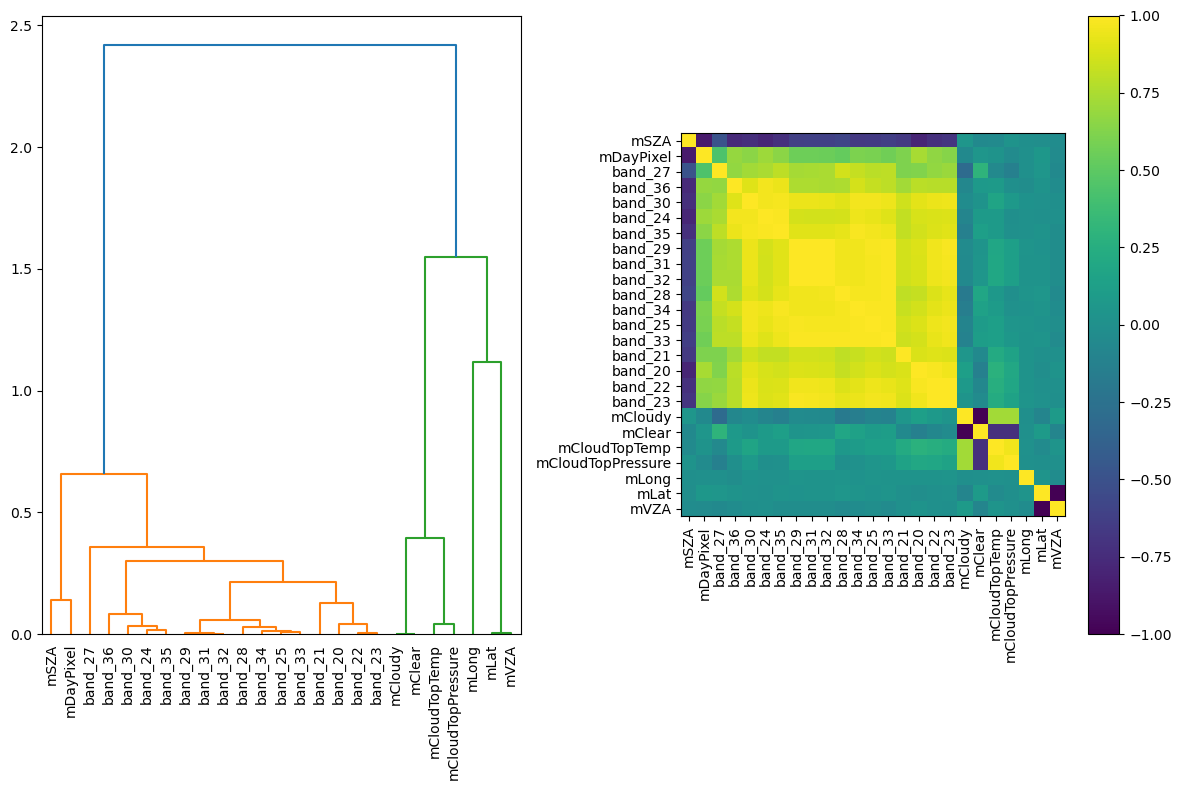

In [9]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from scipy.stats import spearmanr

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(X).correlation

print(type(corr))

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=features_to_use, ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

cax = ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
fig.colorbar(cax, location="right")
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
ax2.set_yticklabels(dendro["ivl"])
_ = fig.tight_layout()

In [10]:
from collections import defaultdict

cluster_ids = hierarchy.fcluster(dist_linkage, 0.2, criterion="distance")
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]
selected_features_names = features_to_use[selected_features]

print(selected_features_names)

X_train_sel = X_train[:, selected_features]
X_test_sel = X_test[:, selected_features]

clf_sel = RandomForestClassifier(max_depth=100, n_estimators=150, min_samples_leaf=1, max_features=0.5, oob_score=True, n_jobs=-1, random_state=26, verbose=1)
clf_sel.fit(X_train_sel, y_train)

print(
    "Baseline accuracy on test data with features removed:"
    f" {clf_sel.score(X_test_sel, y_test):.4}"
)

print(f"OOB score: {clf_sel.oob_score_}")
print(f"Training score: {clf_sel.score(X_train_sel, y_train)}")

['band_20' 'band_24' 'band_25' 'band_27' 'mLong' 'mLat' 'mSZA'
 'mCloudTopTemp' 'mCloudy']


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.6min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 150 out of 150 | elapsed:    2.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Baseline accuracy on test data with features removed: 0.8465
OOB score: 0.8430148478593781


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.3s


Training score: 0.9999980025301285


[Parallel(n_jobs=12)]: Done 150 out of 150 | elapsed:  1.1min finished


### Mean decrease in impurity importance using permutation on selected features

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 150 out of 150 | elapsed:    3.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 150 out of 150 | elapsed:    2.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 150 out of 150 | elapsed:    2.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 150 out of 150 | elapsed:    2.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0

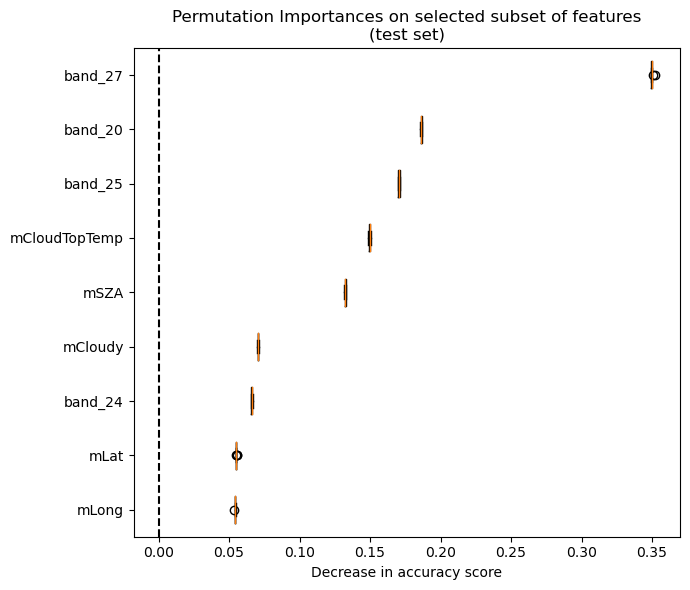

In [30]:
from sklearn.inspection import permutation_importance

def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=1)
    perm_sorted_idx = result.importances_mean.argsort()

    ax.boxplot(
        result.importances[perm_sorted_idx].T,
        vert=False,
        labels=selected_features_names[perm_sorted_idx],
    )
    ax.axvline(x=0, color="k", linestyle="--")
    return ax

fig, ax = plt.subplots(figsize=(7, 6))
plot_permutation_importance(clf_sel, X_test_sel, y_test, ax)
ax.set_title("Permutation Importances on selected subset of features\n(test set)")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()
plt.show()

### Simple feature importance using MDI, on the full feature set

Elapsed time to compute the importances: 1.141 seconds


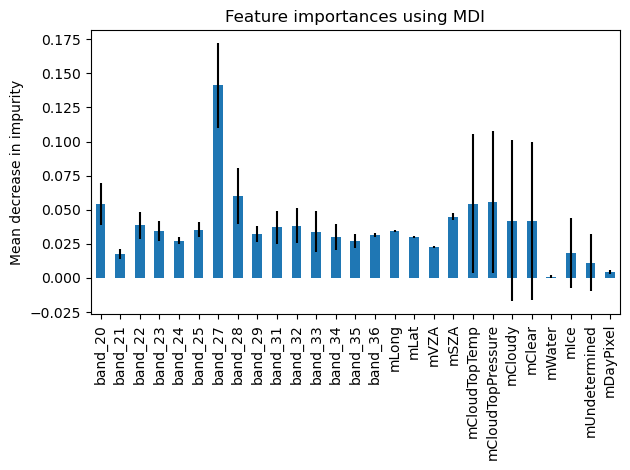

In [3]:
start_time = time.time()

importances = estimators[0].feature_importances_
std = np.std([tree.feature_importances_ for tree in estimators[0].estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(importances, index=features_to_use)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Permutation importance on the full feature set

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    3.4s
[Parallel(n_jobs=12)]: Done 300 out of 300 | elapsed:    5.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    6.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    6.8s
[Parallel(n_jobs=12)]: Done 300 out of 300 | elapsed:   10.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 300 out of 300 | elapsed:   11.5s finished
[Parallel(n_jobs=12)]: Us

Elapsed time to compute the importances: 1802.286 seconds


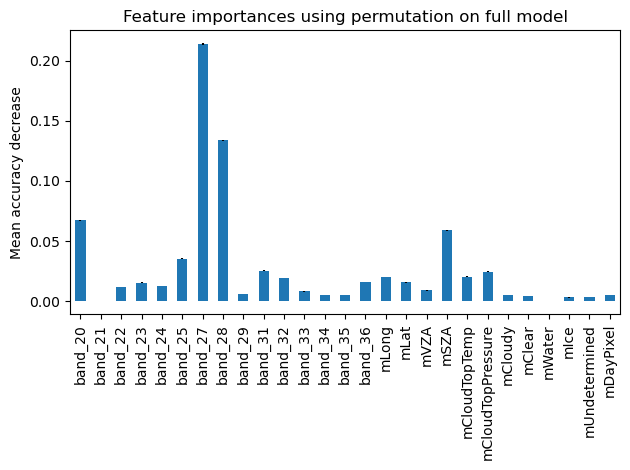

In [4]:
from sklearn.inspection import permutation_importance
start_time = time.time()
result = permutation_importance(
    estimators[0], X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=features_to_use)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

## Example of model comparison

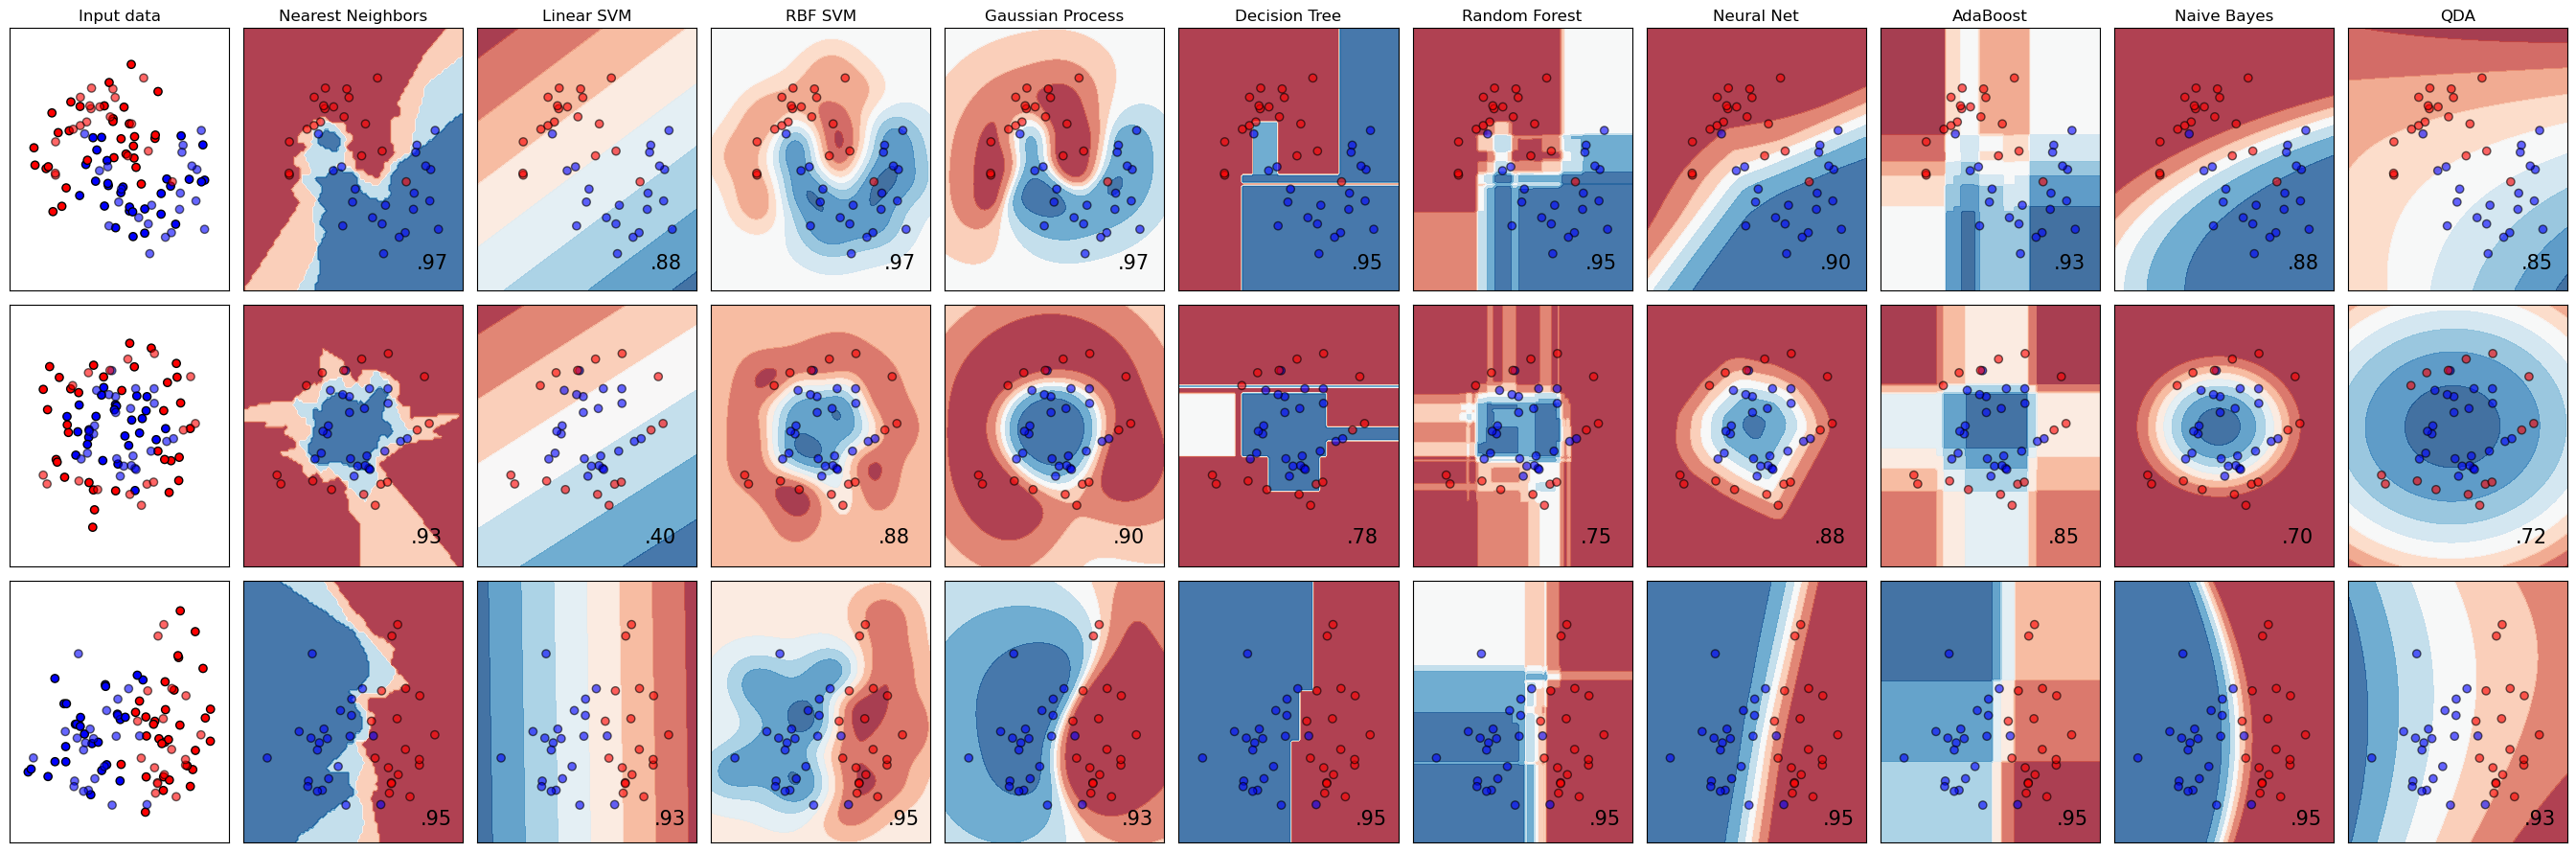

In [11]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

model_names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(algorithm="SAMME", random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(model_names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

# Plot accuracy stats on a grid

In [13]:
import numpy as np
import pandas as pd


# floor all latitudes to multiples of 0.2 degrees and all longitudes to multiples of 1 degree
grid_lat = np.floor(features_with_caliop_labels.mLat * 2) / 2
grid_long = np.floor(features_with_caliop_labels.mLong)

# count the number of datapoints in each grid cell
features_with_caliop_labels["grid_lat"] = grid_lat
features_with_caliop_labels["grid_long"] = grid_long
datapoints_in_gridded_bins = features_with_caliop_labels.groupby(["grid_lat", "grid_long"]).size().reset_index(name="count")


ValueError: 'c' argument has 3619 elements, which is inconsistent with 'x' and 'y' with size 4820.

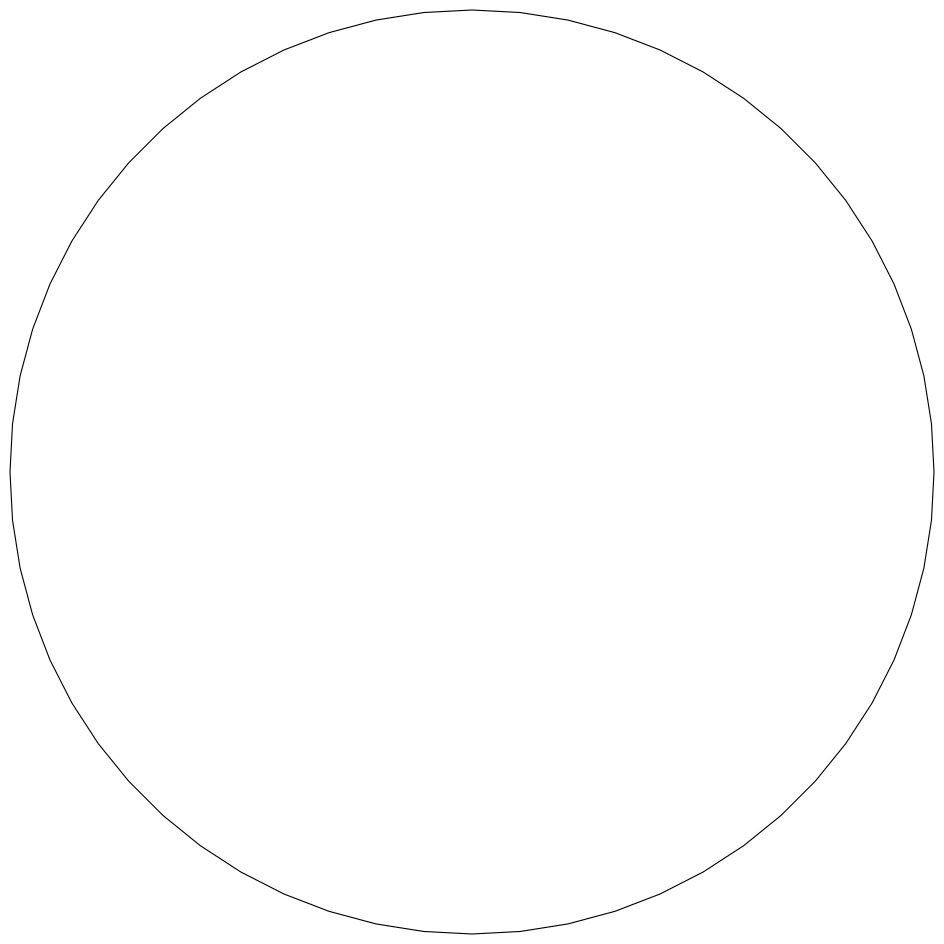

In [14]:
import matplotlib.pyplot as plt
from cartopy import crs as ccrs

# count the number of datapoints in each grid cell
features_with_caliop_labels["grid_lat"] = grid_lat
features_with_caliop_labels["grid_long"] = grid_long
datapoints_in_gridded_bins = features_with_caliop_labels.groupby(["grid_lat", "grid_long"]).size().reset_index(name="count")

# save the datapoints in features_with_caliop_labels that have (cCloudy == 1 and mCloudy == 1) or (cClear == 1 and mClear == 1) in a different dataframe called correct_infrared_cloudy_clear_classifications
all_features_infrared["correct_classification"] = ((all_features_infrared.cCloudy == 1) & (all_features_infrared.mCloudy == 1)) | ((all_features_infrared.cClear == 1) & (all_features_infrared.mClear == 1))

# floor all latitudes to multiples of 0.2 degrees and all longitudes to multiples of 1 degree
grid_lat = np.floor(features_with_caliop_labels.mLat * 3) / 3
grid_long = np.floor(features_with_caliop_labels.mLong)

all_features_infrared["grid_lat"] = grid_lat
all_features_infrared["grid_long"] = grid_long
# count the number of correct classifications in each grid cell
correct_infrared_classifications_binned = all_features_infrared.groupby(["grid_lat", "grid_long", "correct_classification"]).size().reset_index(name="count")
correct_infrared_classifications_percentage = correct_infrared_classifications_binned[correct_infrared_classifications_binned["correct_classification"]]["count"] / all_features_infrared.groupby(["grid_lat", "grid_long"]).size().reset_index(name="count")["count"] * 100

# correct_optical_classifications_binned = correct_optical_cloudy_clear_classifications.groupby(["grid_lat", "grid_long"]).size().reset_index(name="count")
# correct_optical_classifications_percentage = correct_optical_classifications_binned["count"] / datapoints_in_gridded_bins["count"] * 100

central_long = -40
central_lat = 77.5

# plot the percentage of correct classifications in each grid cell
fig, ax = plt.subplots(figsize=(12,12), subplot_kw={"projection": ccrs.Orthographic(central_long, central_lat)})
cax = ax.scatter(correct_infrared_classifications_binned.grid_long, correct_infrared_classifications_binned.grid_lat, c=correct_infrared_classifications_percentage, s=5, transform=ccrs.PlateCarree())
cbar = fig.colorbar(cax)
ax.coastlines()
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle="dashed")


# Testing data_quality_control function

## Clean data

In [1]:
from data_quality_control import data_quality_control

folder = "./2013_2017_DATA/"
data_quality_control(folder, verbose=True)

Collocation database (3172366, 4)
   profile_id  pixel_id        mFileID              cFileID
0       39585     23633  A2017032.0500  2017-02-01T04-57-07
1       39600     23903  A2017032.0500  2017-02-01T04-57-07
2       39615     24173  A2017032.0500  2017-02-01T04-57-07
3       39630     24443  A2017032.0500  2017-02-01T04-57-07
4       39645     24713  A2017032.0500  2017-02-01T04-57-07
MODIS training features (3155701, 46)
          fileID  pixel_id  band_20  band_21  band_22  band_23  band_24  \
0  A2017032.0500     23633   0.0446   0.0915   0.0693   0.0838   0.0520   
1  A2017032.0500     23903   0.0407   0.0811   0.0659   0.0784   0.0488   
2  A2017032.0500     24173   0.0410   0.0361   0.0657   0.0792   0.0497   
3  A2017032.0500     24443   0.0405   0.0811   0.0659   0.0792   0.0498   
4  A2017032.0500     24713   0.0380   0.0361   0.0602   0.0708   0.0476   

   band_25  band_27  band_28  ...  band_18  band_19  band_26    mLong  \
0   0.1215   0.9788   1.8074  ...      NaN  

## Read cleaned data

In [3]:
import pandas as pd

clean_infrared_features = pd.read_csv(folder + "clean_infrared_features.csv")
clean_optical_features = pd.read_csv(folder + "clean_optical_features.csv")

# read labels now
clean_infrared_labels = pd.read_csv(folder + "clean_infrared_labels.csv")
clean_optical_labels = pd.read_csv(folder + "clean_optical_labels.csv")

# print the heads of the dataframes
print("Clean infrared features", clean_infrared_features.shape)
display(clean_infrared_features.head())
print("Clean optical features", clean_optical_features.shape)
display(clean_optical_features.head())
print("Clean infrared labels", clean_infrared_labels.shape)
display(clean_infrared_labels.head())
print("Clean optical labels", clean_optical_labels.shape)
display(clean_optical_labels.head())

# print the number of nan values in each column of clean_optical_features
print(clean_optical_features.isna().sum())

Clean infrared features (1873679, 31)


,profile_id,pixel_id,mFileID,cFileID,band_20,band_21,band_22,band_23,band_24,band_25,...,mVZA,mSZA,mCloudTopTemp,mCloudTopPressure,mCloudy,mClear,mWater,mIce,mUndetermined,mDayPixel
0,40950,48205,A2017032.0500,2017-02-01T04-57-07,0.0362,0.0569,0.0581,0.0688,0.0452,0.1017,...,4.51,117.69,247.14,535.0,0,1,0,0,0,0
1,41130,51446,A2017032.0500,2017-02-01T04-57-07,0.0348,0.0534,0.0551,0.0666,0.0424,0.0969,...,4.96,118.16,235.72,515.0,1,0,0,1,0,0
2,41145,51716,A2017032.0500,2017-02-01T04-57-07,0.0382,0.0361,0.0597,0.0704,0.0457,0.1033,...,4.95,118.20,211.32,535.0,1,0,0,1,0,0
3,41160,51986,A2017032.0500,2017-02-01T04-57-07,0.0402,0.0846,0.0631,0.0760,0.0465,0.1125,...,4.96,118.24,261.63,960.0,1,0,0,0,1,0
4,41190,52526,A2017032.0500,2017-02-01T04-57-07,0.0358,0.0569,0.0563,0.0660,0.0400,0.0942,...,4.95,118.32,243.27,495.0,1,0,0,1,0,0


Clean optical features (817676, 53)


,profile_id,pixel_id,mFileID,cFileID,band_20,band_21,band_22,band_23,band_24,band_25,...,mVZA,mSZA,mCloudTopTemp,mCloudTopPressure,mCloudy,mClear,mWater,mIce,mUndetermined,mDayPixel
0,143955,52498,A2017033.1525,2017-02-02T14-41-21,0.0694,0.0985,0.1039,0.1182,0.0575,0.1454,...,7.69,79.68,-100.0,-100.0,0,1,0,0,0,1
1,143970,52768,A2017033.1525,2017-02-02T14-41-21,0.0669,0.1643,0.1023,0.1170,0.0584,0.1436,...,7.70,79.72,-100.0,-100.0,0,1,0,0,0,1
2,143985,53038,A2017033.1525,2017-02-02T14-41-21,0.0615,0.1227,0.0931,0.1052,0.0553,0.1371,...,7.69,79.77,-100.0,-100.0,0,1,0,0,0,1
3,144120,55468,A2017033.1525,2017-02-02T14-41-21,0.0525,0.1089,0.0700,0.0796,0.0539,0.1107,...,7.70,80.14,-100.0,-100.0,0,1,0,0,0,1
4,144135,55738,A2017033.1525,2017-02-02T14-41-21,0.0524,0.0742,0.0682,0.0761,0.0517,0.1070,...,7.69,80.18,-100.0,-100.0,0,1,0,0,0,1


Clean infrared labels (1873679, 3)


,profile_id,cFileID,class
0,40950,2017-02-01T04-57-07,2
1,41130,2017-02-01T04-57-07,2
2,41145,2017-02-01T04-57-07,2
3,41160,2017-02-01T04-57-07,2
4,41190,2017-02-01T04-57-07,2


Clean optical labels (817676, 3)


,profile_id,cFileID,class
0,143955,2017-02-02T14-41-21,2
1,143970,2017-02-02T14-41-21,2
2,143985,2017-02-02T14-41-21,2
3,144120,2017-02-02T14-41-21,2
4,144135,2017-02-02T14-41-21,2


profile_id               0
pixel_id                 0
mFileID                  0
cFileID                  0
band_20                  0
band_21                  0
band_22                  0
band_23                  0
band_24                  0
band_25                  0
band_27                  0
band_28                  0
band_29                  0
band_30                  0
band_31                  0
band_32                  0
band_33                  0
band_34                  0
band_35                  0
band_36                  0
band_1                 191
band_2                 657
band_3                 191
band_4                 191
band_5                 191
band_7                 191
band_8               15287
band_9                2321
band_10                191
band_11                191
band_12                191
band_13lo              191
band_13hi              191
band_14lo              191
band_14hi              191
band_15                191
band_16                191
b

## Evaluate MYD06 algorithm performance

### Cloudy and clear discrimination

               modis_clear  modis_cloudy
caliop_clear      0.878825      0.121175
caliop_cloudy     0.316972      0.683028


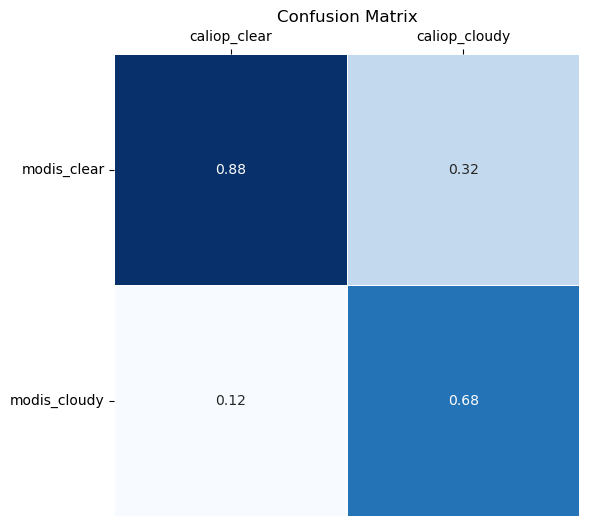

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming caliop_phase and modis_infrared_phase are DataFrames

# Calculate correlation values
caliop_cloudy_modis_cloudy = sum((clean_infrared_labels["class"] != 0) & clean_infrared_features.mCloudy.values) / sum((clean_infrared_labels["class"] != 0))
caliop_cloudy_modis_clear = sum((clean_infrared_labels["class"] != 0) & clean_infrared_features.mClear.values) / sum((clean_infrared_labels["class"] != 0))
caliop_clear_modis_cloudy = sum((clean_infrared_labels["class"] == 0) & clean_infrared_features.mCloudy.values) / sum((clean_infrared_labels["class"] == 0))
caliop_clear_modis_clear = sum((clean_infrared_labels["class"] == 0) & clean_infrared_features.mClear.values) / sum((clean_infrared_labels["class"] == 0))

correlation_table = pd.DataFrame({
    'modis_clear': [caliop_clear_modis_clear, caliop_cloudy_modis_clear],
    'modis_cloudy': [caliop_clear_modis_cloudy, caliop_cloudy_modis_cloudy]
}, index=['caliop_clear', 'caliop_cloudy'])

# Display correlation table
print(correlation_table)

# Create a 2 by 2 grid plot
fig, ax = plt.subplots(figsize=(6, 6))

# Plot correlation matrix with x and y axes swapped
sns.heatmap(correlation_table.T, cmap="Blues", annot=True, fmt=".2f", linewidths=.5, ax=ax, cbar=False)

# Set plot labels
ax.set_title("Confusion Matrix")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.xaxis.tick_top()  # Place x-axis labels on top

# Show the plot
plt.show()

### Cloud phase discrimination

              modis_clear  modis_water  modis_ice  modis_undetermined
caliop_clear     0.878825     0.019017   0.049091            0.053067
caliop_water     0.108802     0.130415   0.085406            0.675377
caliop_ice       0.410229     0.017733   0.380784            0.191254
caliop_mixed     0.136268     0.049257   0.236574            0.577901


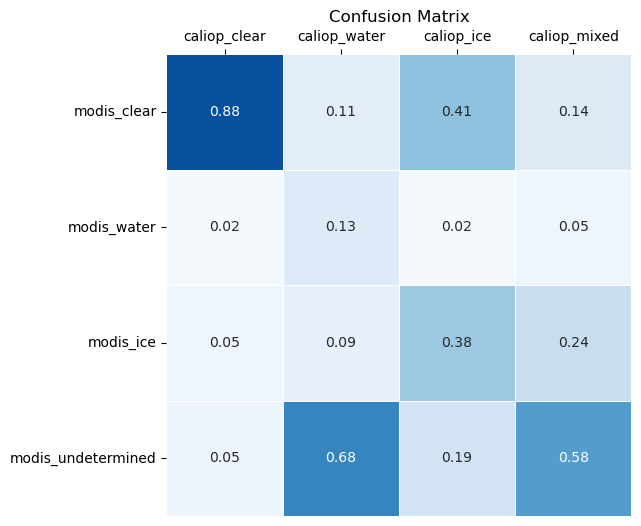

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming clean_infrared_features is a DataFrame containing relevant data

# Calculate correlation values
caliop_water_modis_water = sum((clean_infrared_labels["class"]==1) & clean_infrared_features.mWater.values) / sum(clean_infrared_labels["class"]==1)
caliop_water_modis_ice = sum((clean_infrared_labels["class"]==1) & clean_infrared_features.mIce.values) / sum(clean_infrared_labels["class"]==1)
caliop_water_modis_undetermined = sum((clean_infrared_labels["class"]==1) & clean_infrared_features.mUndetermined.values) / sum(clean_infrared_labels["class"]==1)
caliop_water_modis_clear = sum((clean_infrared_labels["class"]==1) & clean_infrared_features.mClear.values) / sum(clean_infrared_labels["class"]==1)

caliop_ice_modis_water = sum((clean_infrared_labels["class"]==2) & clean_infrared_features.mWater.values) / sum((clean_infrared_labels["class"]==2))
caliop_ice_modis_ice = sum((clean_infrared_labels["class"]==2) & clean_infrared_features.mIce.values) / sum((clean_infrared_labels["class"]==2))
caliop_ice_modis_undetermined = sum((clean_infrared_labels["class"]==2) & clean_infrared_features.mUndetermined.values) / sum((clean_infrared_labels["class"]==2))
caliop_ice_modis_clear = sum((clean_infrared_labels["class"]==2) & clean_infrared_features.mClear.values) / sum((clean_infrared_labels["class"]==2))

# now do it for caliop clear modis water, ice, undetermined, clear
caliop_clear_modis_water = sum((clean_infrared_labels["class"]==0) & clean_infrared_features.mWater.values) / sum((clean_infrared_labels["class"]==0))
caliop_clear_modis_ice = sum((clean_infrared_labels["class"]==0) & clean_infrared_features.mIce.values) / sum((clean_infrared_labels["class"]==0))
caliop_clear_modis_undetermined = sum((clean_infrared_labels["class"]==0) & clean_infrared_features.mUndetermined.values) / sum((clean_infrared_labels["class"]==0))
caliop_clear_modis_clear = sum((clean_infrared_labels["class"]==0) & clean_infrared_features.mClear.values) / sum((clean_infrared_labels["class"]==0))

# now for caliop mixed multilayer modis water, ice, undetermined, clear
caliop_mixed_modis_water = sum((clean_infrared_labels["class"]==3) & clean_infrared_features.mWater.values) / sum((clean_infrared_labels["class"]==3))
caliop_mixed_modis_ice = sum((clean_infrared_labels["class"]==3) & clean_infrared_features.mIce.values) / sum((clean_infrared_labels["class"]==3))
caliop_mixed_modis_undetermined = sum((clean_infrared_labels["class"]==3) & clean_infrared_features.mUndetermined.values) / sum((clean_infrared_labels["class"]==3))
caliop_mixed_modis_clear = sum((clean_infrared_labels["class"]==3) & clean_infrared_features.mClear.values) / sum((clean_infrared_labels["class"]==3))

# Create a DataFrame with the calculated values
correlation_table = pd.DataFrame({
    'modis_clear': [caliop_clear_modis_clear, caliop_water_modis_clear, caliop_ice_modis_clear, caliop_mixed_modis_clear],
    'modis_water': [caliop_clear_modis_water, caliop_water_modis_water, caliop_ice_modis_water, caliop_mixed_modis_water],
    'modis_ice': [caliop_clear_modis_ice, caliop_water_modis_ice, caliop_ice_modis_ice, caliop_mixed_modis_ice],
    'modis_undetermined': [caliop_clear_modis_undetermined, caliop_water_modis_undetermined, caliop_ice_modis_undetermined, caliop_mixed_modis_undetermined]
}, index=['caliop_clear', 'caliop_water', 'caliop_ice', 'caliop_mixed'])

# Display correlation table
print(correlation_table)

fig, ax = plt.subplots(figsize=(6, 6))

# Plot correlation matrix
sns.heatmap(correlation_table.T, cmap="Blues", annot=True, fmt=".2f", linewidths=.5, ax=ax, cbar=False, vmin=0, vmax=1)

# Set plot labels
ax.set_title("Confusion Matrix")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.xaxis.tick_top()  # Place x-axis labels on top

# Show the plot
plt.show()

### Create confusion matrix plotting function

               modis_clear  modis_cloudy
caliop_clear      0.901724      0.098276
caliop_cloudy     0.295703      0.704297


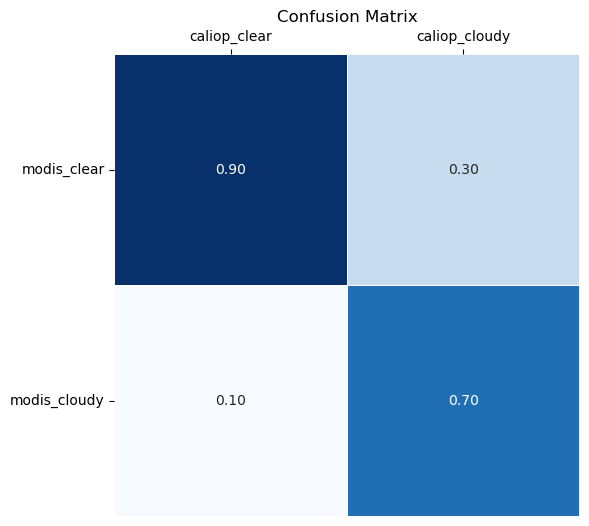

              modis_clear  modis_water  modis_ice  modis_undetermined
caliop_clear     0.901724     0.038097   0.051584            0.008596
caliop_water     0.071097     0.731204   0.096461            0.101239
caliop_ice       0.450998     0.068829   0.440821            0.039352
caliop_mixed     0.123483     0.485448   0.260196            0.130872


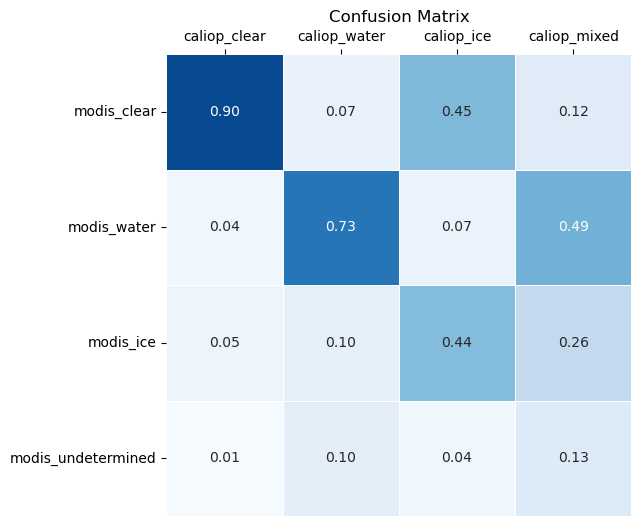

[               modis_clear  modis_cloudy
 caliop_clear      0.901724      0.098276
 caliop_cloudy     0.295703      0.704297,
               modis_clear  modis_water  modis_ice  modis_undetermined
 caliop_clear     0.901724     0.038097   0.051584            0.008596
 caliop_water     0.071097     0.731204   0.096461            0.101239
 caliop_ice       0.450998     0.068829   0.440821            0.039352
 caliop_mixed     0.123483     0.485448   0.260196            0.130872]

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix_modis_caliop(modis_phase_df, caliop_labels, save=False, save_path=None):
    # Assuming caliop_labels is a numpy array and modis_phase_df is a DataFrame

    # Calculate correlation values
    caliop_cloudy_modis_cloudy = sum((caliop_labels != 0) & modis_phase_df.mCloudy.values) / sum((caliop_labels != 0))
    caliop_cloudy_modis_clear = sum((caliop_labels != 0) & modis_phase_df.mClear.values) / sum((caliop_labels != 0))
    caliop_clear_modis_cloudy = sum((caliop_labels == 0) & modis_phase_df.mCloudy.values) / sum((caliop_labels == 0))
    caliop_clear_modis_clear = sum((caliop_labels == 0) & modis_phase_df.mClear.values) / sum((caliop_labels == 0))

    correlation_table = pd.DataFrame({
        'modis_clear': [caliop_clear_modis_clear, caliop_cloudy_modis_clear],
        'modis_cloudy': [caliop_clear_modis_cloudy, caliop_cloudy_modis_cloudy]
    }, index=['caliop_clear', 'caliop_cloudy'])

    # Display correlation table
    print(correlation_table)

    confusion_tables = [correlation_table]

    # Create a 2 by 2 grid plot
    fig, ax = plt.subplots(figsize=(6, 6))

    # Plot correlation matrix with x and y axes swapped
    sns.heatmap(correlation_table.T, cmap="Blues", annot=True, fmt=".2f", linewidths=.5, ax=ax, cbar=False)

    # Set plot labels
    ax.set_title("Confusion Matrix")
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.xaxis.tick_top()  # Place x-axis labels on top

    # Show the plot
    plt.show()

    if save:
        fig.savefig(save_path, bbox_inches="tight", dpi=300)
    
    caliop_water_modis_water = sum((caliop_labels==1) & modis_phase_df.mWater.values) / sum(caliop_labels==1)
    caliop_water_modis_ice = sum((caliop_labels==1) & modis_phase_df.mIce.values) / sum(caliop_labels==1)
    caliop_water_modis_undetermined = sum((caliop_labels==1) & modis_phase_df.mUndetermined.values) / sum(caliop_labels==1)
    caliop_water_modis_clear = sum((caliop_labels==1) & modis_phase_df.mClear.values) / sum(caliop_labels==1)

    caliop_ice_modis_water = sum((caliop_labels==2) & modis_phase_df.mWater.values) / sum((caliop_labels==2))
    caliop_ice_modis_ice = sum((caliop_labels==2) & modis_phase_df.mIce.values) / sum((caliop_labels==2))
    caliop_ice_modis_undetermined = sum((caliop_labels==2) & modis_phase_df.mUndetermined.values) / sum((caliop_labels==2))
    caliop_ice_modis_clear = sum((caliop_labels==2) & modis_phase_df.mClear.values) / sum((caliop_labels==2))

    # now do it for caliop clear modis water, ice, undetermined, clear
    caliop_clear_modis_water = sum((caliop_labels==0) & modis_phase_df.mWater.values) / sum((caliop_labels==0))
    caliop_clear_modis_ice = sum((caliop_labels==0) & modis_phase_df.mIce.values) / sum((caliop_labels==0))
    caliop_clear_modis_undetermined = sum((caliop_labels==0) & modis_phase_df.mUndetermined.values) / sum((caliop_labels==0))
    caliop_clear_modis_clear = sum((caliop_labels==0) & modis_phase_df.mClear.values) / sum((caliop_labels==0))

    # now for caliop mixed multilayer modis water, ice, undetermined, clear
    caliop_mixed_modis_water = sum((caliop_labels==3) & modis_phase_df.mWater.values) / sum((caliop_labels==3))
    caliop_mixed_modis_ice = sum((caliop_labels==3) & modis_phase_df.mIce.values) / sum((caliop_labels==3))
    caliop_mixed_modis_undetermined = sum((caliop_labels==3) & modis_phase_df.mUndetermined.values) / sum((caliop_labels==3))
    caliop_mixed_modis_clear = sum((caliop_labels==3) & modis_phase_df.mClear.values) / sum((caliop_labels==3))

    # Create a DataFrame with the calculated values
    correlation_table = pd.DataFrame({
        'modis_clear': [caliop_clear_modis_clear, caliop_water_modis_clear, caliop_ice_modis_clear, caliop_mixed_modis_clear],
        'modis_water': [caliop_clear_modis_water, caliop_water_modis_water, caliop_ice_modis_water, caliop_mixed_modis_water],
        'modis_ice': [caliop_clear_modis_ice, caliop_water_modis_ice, caliop_ice_modis_ice, caliop_mixed_modis_ice],
        'modis_undetermined': [caliop_clear_modis_undetermined, caliop_water_modis_undetermined, caliop_ice_modis_undetermined, caliop_mixed_modis_undetermined]
    }, index=['caliop_clear', 'caliop_water', 'caliop_ice', 'caliop_mixed'])

    # Display correlation table
    print(correlation_table)

    confusion_tables.append(correlation_table)

    fig, ax = plt.subplots(figsize=(6, 6))

    # Plot correlation matrix
    sns.heatmap(correlation_table.T, cmap="Blues", annot=True, fmt=".2f", linewidths=.5, ax=ax, cbar=False, vmin=0, vmax=1)

    # Set plot labels
    ax.set_title("Confusion Matrix")
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.xaxis.tick_top()  # Place x-axis labels on top

    # Show the plot
    plt.show()

    if save:
        fig.savefig(save_path, bbox_inches="tight", dpi=300)

    return confusion_tables

plot_confusion_matrix_modis_caliop(clean_optical_features, clean_optical_labels["class"].values)

# Train RF on new labels

## Clean data

In [1]:
from data_quality_control import data_quality_control
import pandas as pd

folder = "./2013_2017_DATA/"
# folder = "./JASMIN_tests/Antarctica/merged_features"
data_quality_control(folder, verbose=True)

Collocation database (3172366, 4)
   profile_id  pixel_id        mFileID              cFileID
0       39585     23633  A2017032.0500  2017-02-01T04-57-07
1       39600     23903  A2017032.0500  2017-02-01T04-57-07
2       39615     24173  A2017032.0500  2017-02-01T04-57-07
3       39630     24443  A2017032.0500  2017-02-01T04-57-07
4       39645     24713  A2017032.0500  2017-02-01T04-57-07
MODIS training features (3155701, 50)
          fileID  pixel_id  mCloudTopTemp  mCloudTopPressure  mBeta11_12  \
0  A2017032.0500     23633            NaN                NaN         NaN   
1  A2017032.0500     23903            NaN                NaN         NaN   
2  A2017032.0500     24173            NaN                NaN         NaN   
3  A2017032.0500     24443            NaN                NaN         NaN   
4  A2017032.0500     24713            NaN                NaN         NaN   

   mBeta85_11    mLong     mLat  mVZA    mSZA  ...  band_13lo  band_13hi  \
0         NaN -14.1307  76.0587  3.

## Read clean data

In [3]:
import pandas as pd

folder = "./2013_2017_DATA/"
# folder = "./JASMIN_tests/Antarctica/merged_features/"

clean_infrared_features = pd.read_csv(folder + "clean_infrared_features.csv")
clean_optical_features = pd.read_csv(folder + "clean_optical_features.csv")

# read labels now
clean_infrared_labels = pd.read_csv(folder + "clean_infrared_labels.csv")
clean_optical_labels = pd.read_csv(folder + "clean_optical_labels.csv")

# print the heads of the dataframes
print("Clean infrared features", clean_infrared_features.shape)
display(clean_infrared_features.head())
print("Clean optical features", clean_optical_features.shape)
display(clean_optical_features.head())
print("Clean infrared labels", clean_infrared_labels.shape)
display(clean_infrared_labels.head())
print("Clean optical labels", clean_optical_labels.shape)
display(clean_optical_labels.head())

print(clean_infrared_features.isna().sum())

Clean infrared features (992561, 48)


,profile_id,pixel_id,mFileID,cFileID,cColumnOpticalDepth,cCloudGeometricalThickness,cCloudTopHeight,mCloudTopTemp,mCloudTopPressure,mLong,...,BT11,BT12,BT85,BT73,BTD85_11,BTD73_11,BTD12_11,BTD39_12,BTD39_11,day_of_year
0,41145,51716,A2017032.0500,2017-02-01T04-57-07,0.878144,12.828502,10.276642,211.32,535.0,-23.4371,...,246.161775,245.913013,247.543539,240.341959,1.381764,-5.819816,-0.248762,4.358057,4.109295,32
1,41160,51986,A2017032.0500,2017-02-01T04-57-07,1.497805,12.080048,10.097013,261.63,960.0,-23.5133,...,249.207810,249.047732,250.160638,242.437142,0.952828,-6.770669,-0.160078,2.180758,2.020680,32
2,41190,52526,A2017032.0500,2017-02-01T04-57-07,8.553540,5.373900,10.156890,243.27,495.0,-23.6610,...,244.699710,243.878522,246.001206,238.564089,1.301495,-6.135622,-0.821189,5.386893,4.565704,32
3,41205,52796,A2017032.0500,2017-02-01T04-57-07,-333.000000,5.014642,10.156890,211.27,515.0,-23.7333,...,246.784867,246.410864,247.893094,240.330736,1.108227,-6.454131,-0.374003,3.657273,3.283270,32
4,41265,53876,A2017032.0500,2017-02-01T04-57-07,5.073112,6.331921,9.318621,260.25,940.0,-24.0227,...,248.254220,247.594582,249.710166,240.948733,1.455945,-7.305487,-0.659638,4.309917,3.650279,32


Clean optical features (769366, 56)


,profile_id,pixel_id,mFileID,cFileID,cColumnOpticalDepth,cCloudGeometricalThickness,cCloudTopHeight,mCloudTopTemp,mCloudTopPressure,mLong,...,ratio_R213_124,ratio_R065_086,BT11,BT12,BT85,BT73,BTD85_11,BTD73_11,BTD12_11,day_of_year
0,143955,52498,A2017033.1525,2017-02-02T14-41-21,0.879424,1.347217,2.866947,-100.0,-100.0,-42.5333,...,0.028292,2.008421,246.161775,245.913013,247.543539,240.341959,1.381764,-5.819816,-0.248762,33
1,143970,52768,A2017033.1525,2017-02-02T14-41-21,0.925111,1.556784,2.866947,-100.0,-100.0,-42.5621,...,0.030850,2.208578,249.207810,249.047732,250.160638,242.437142,0.952828,-6.770669,-0.160078,33
2,143985,53038,A2017033.1525,2017-02-02T14-41-21,0.127803,1.347217,2.866947,-100.0,-100.0,-42.5967,...,0.033184,1.864441,244.699710,243.878522,246.001206,238.564089,1.301495,-6.135622,-0.821189,33
3,144120,55468,A2017033.1525,2017-02-02T14-41-21,0.031650,0.389196,7.686991,-100.0,-100.0,-42.8825,...,0.026244,1.384625,246.784867,246.410864,247.893094,240.330736,1.108227,-6.454131,-0.374003,33
4,144135,55738,A2017033.1525,2017-02-02T14-41-21,0.419227,0.688578,7.866620,-100.0,-100.0,-42.9159,...,0.028447,1.379645,248.254220,247.594582,249.710166,240.948733,1.455945,-7.305487,-0.659638,33


Clean infrared labels (992561, 10)


,profile_id,cFileID,cCloudy,cClear,cWater,cIce,cCloudTopHeight,cCloudGeometricalThickness,cColumnOpticalDepth,class
0,41145,2017-02-01T04-57-07,1,0,0,1,10.276642,12.828502,0.878144,2
1,41160,2017-02-01T04-57-07,1,0,0,1,10.097013,12.080048,1.497805,2
2,41190,2017-02-01T04-57-07,1,0,0,1,10.156890,5.373900,8.553540,2
3,41205,2017-02-01T04-57-07,1,0,0,1,10.156890,5.014642,-333.000000,2
4,41265,2017-02-01T04-57-07,1,0,0,1,9.318621,6.331921,5.073112,2


Clean optical labels (769366, 10)


,profile_id,cFileID,cCloudy,cClear,cWater,cIce,cCloudTopHeight,cCloudGeometricalThickness,cColumnOpticalDepth,class
0,143955,2017-02-02T14-41-21,1,0,0,1,2.866947,1.347217,0.879424,2
1,143970,2017-02-02T14-41-21,1,0,0,1,2.866947,1.556784,0.925111,2
2,143985,2017-02-02T14-41-21,1,0,0,1,2.866947,1.347217,0.127803,2
3,144120,2017-02-02T14-41-21,1,0,0,1,7.686991,0.389196,0.031650,2
4,144135,2017-02-02T14-41-21,1,0,0,1,7.866620,0.688578,0.419227,2


profile_id                    0
pixel_id                      0
mFileID                       0
cFileID                       0
cColumnOpticalDepth           0
cCloudGeometricalThickness    0
cCloudTopHeight               0
mCloudTopTemp                 0
mCloudTopPressure             0
mLong                         0
mLat                          0
mVZA                          0
mSZA                          0
mLST_night                    0
band_20                       0
band_21                       0
band_22                       0
band_23                       0
band_24                       0
band_25                       0
band_27                       0
band_28                       0
band_29                       0
band_30                       0
band_31                       0
band_32                       0
band_33                       0
band_34                       0
band_35                       0
band_36                       0
mCloudy                       0
mClear  

## Create models, train them and log results

### Manufacture physically significant features

/Users/alexandrudobra/anaconda3/envs/MPhys/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Index(['profile_id', 'pixel_id', 'mFileID', 'cFileID', 'mCloudTopTemp',
       'mCloudTopPressure', 'mLong', 'mLat', 'mVZA', 'mSZA', 'mLST_night',
       'band_20', 'band_21', 'band_22', 'band_23', 'band_24', 'band_25',
       'band_27', 'band_28', 'band_29', 'band_30', 'band_31', 'band_32',
       'band_33', 'band_34', 'band_35', 'band_36', 'mCloudy', 'mClear',
       'mWater', 'mIce', 'mUndetermined', 'mDayPixel', 'BT11', 'BT12', 'BT85',
       'BT73', 'BTD85_11', 'BTD73_11', 'day_of_year', 'BT39', 'BT67',
       'BTD12_11', 'BTD39_12', 'BTD39_11'],
      dtype='object')
Index(['profile_id', 'pixel_id', 'mFileID', 'cFileID', 'mCloudTopTemp',
       'mCloudTopPressure', 'mLong', 'mLat', 'mVZA', 'mSZA', 'mLST_day',
       'band_1', 'band_2', 'band_3', 'band_4', 'band_5', 'band_7', 'band_17',
       'band_18', 'band_19', 'band_26', 'band_20', 'band_21', 'band_22',
       'band_23', 'band_24', 'band_25', 'band_27', 'band_28', 'band_29',
       'band_30', 'band_31', 'band_32', 'band_33', 

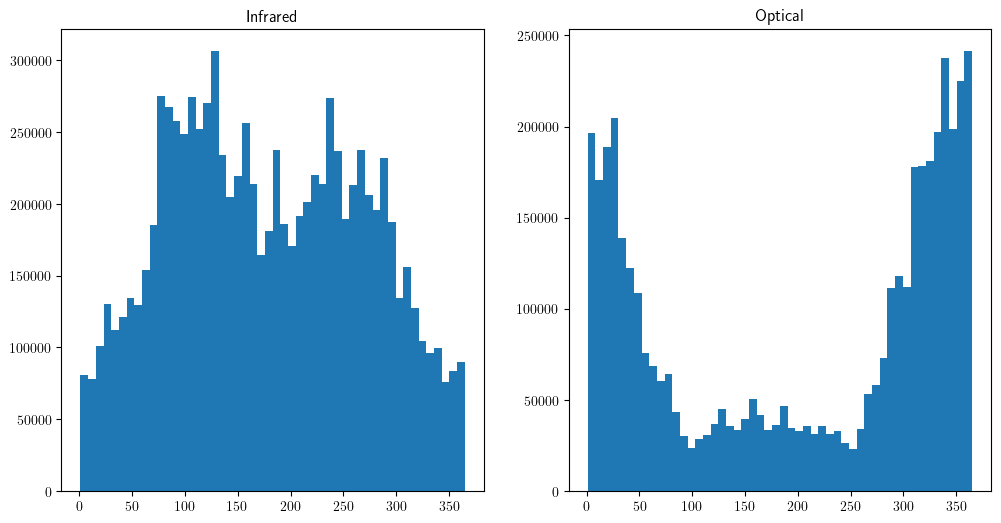

In [13]:
def brightness_temperature_to_radiance(BT, **kwargs):
    # constants
    h = 6.626e-34
    c = 3.0e8
    k = 1.38e-23

    # get wavelength from kwargs and return the radiance according to Planck's law in those units
    if 'wavelength' in kwargs:
        wavelength = kwargs['wavelength']
        return 2*h*c**2 / (wavelength**5) * 1 / (np.exp(h*c / (wavelength*k*BT)) - 1)
    elif 'frequency' in kwargs:
        frequency = kwargs['frequency']
        wavelength = c / frequency
        return 8*np.pi*h*frequency**3 / (c**2) * 1 / (np.exp(h*frequency / (k*BT)) - 1)
    elif 'wavenumber' in kwargs:
        wavenumber = kwargs['wavenumber']
        wavelength = 1 / wavenumber
        return 2*h*c**2 * wavenumber**3 / (np.exp(h*c*wavenumber / (k*BT)) - 1)
    else:
        raise ValueError('No wavelength, frequency, or wavenumber provided')

def radiance_to_brighness_temperature(radiance, **kwargs):
    # constants
    h = 6.626e-34
    c = 3.0e8
    k = 1.38e-23

    # get wavelength from kwargs
    if 'wavelength' in kwargs:
        wavelength = kwargs['wavelength']
        return h*c / (wavelength*k) / np.log(2*h*c**2 / (wavelength**5 * radiance) + 1)
    elif 'frequency' in kwargs:
        frequency = kwargs['frequency']
        return h*frequency / (k*np.log(2*h*frequency**3 / (c**2 * radiance) + 1))
    elif 'wavenumber' in kwargs:
        wavenumber = kwargs['wavenumber']
        return h*c*wavenumber / (k*np.log(2*h*c**2 * wavenumber**3 / radiance + 1))
    else:
        raise ValueError('No wavelength, frequency, or wavenumber provided')

import numpy as np

# convert radiance to SI units (W/m^2/sr/um to W/m^2/sr/m)
BT11 = radiance_to_brighness_temperature(clean_infrared_features["band_31"] * 1e6, wavelength=11e-6)
BT85 = radiance_to_brighness_temperature(clean_infrared_features["band_29"] * 1e6, wavelength=8.5e-6)
BT73 = radiance_to_brighness_temperature(clean_infrared_features["band_28"] * 1e6, wavelength=7.3e-6)
BT12 = radiance_to_brighness_temperature(clean_infrared_features["band_32"] * 1e6, wavelength=12e-6)
BT39 = radiance_to_brighness_temperature(clean_infrared_features["band_22"] * 1e6, wavelength=3.96e-6)
BT67 = radiance_to_brighness_temperature(clean_infrared_features["band_27"] * 1e6, wavelength=6.7e-6)

BTD85_11 = BT85 - BT11
BTD73_11 = BT73 - BT11
BTD12_11 = BT12 - BT11
BTD39_12 = BT39 - BT12
BTD39_11 = BT39 - BT11

clean_infrared_features["BT39"] = BT39
clean_infrared_features["BT67"] = BT67
clean_infrared_features["BT11"] = BT11
clean_infrared_features['BT12'] = BT12
clean_infrared_features["BT85"] = BT85
clean_infrared_features["BT73"] = BT73
clean_infrared_features["BTD85_11"] = BTD85_11
clean_infrared_features["BTD73_11"] = BTD73_11
clean_infrared_features["BTD12_11"] = BTD12_11
clean_infrared_features["BTD39_12"] = BTD39_12
clean_infrared_features["BTD39_11"] = BTD39_11

# band 6 does not exist?
reflectance_ratio213_124 = clean_optical_features["band_7"] / clean_optical_features["band_5"]
reflectance_ratio065_086 = clean_optical_features["band_1"] / clean_optical_features["band_2"]
# reflectance_ratio16_124 = clean_optical_features["band_6"] / clean_optical_features["band_5"]

clean_optical_features["ratio_R213_124"] = reflectance_ratio213_124
clean_optical_features["ratio_R065_086"] = reflectance_ratio065_086
# clean_optical_features["ratio_R16_124"] = reflectance_ratio16_124

clean_optical_features["BT11"] = BT11
clean_optical_features['BT12'] = BT12
clean_optical_features["BT85"] = BT85
clean_optical_features["BT73"] = BT73
clean_optical_features["BTD85_11"] = BTD85_11
clean_optical_features["BTD73_11"] = BTD73_11
clean_optical_features["BTD12_11"] = BTD12_11

# get the day of the year from the date
clean_infrared_features['day_of_year'] = clean_infrared_features['mFileID'].apply(lambda x: int(x[5:8]))
clean_optical_features['day_of_year'] = clean_optical_features['mFileID'].apply(lambda x: int(x[5:8]))


print(clean_infrared_features.columns)
print(clean_optical_features.columns)

# plot histogram of day_of_year
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(clean_infrared_features['day_of_year'], bins=50)
ax[0].set_title("Infrared")
ax[1].hist(clean_optical_features['day_of_year'], bins=50)
ax[1].set_title("Optical")
plt.show()


#### Save manufactured features

In [14]:
# save the new features
clean_infrared_features.to_csv(folder + "clean_infrared_features.csv", index=False)
clean_optical_features.to_csv(folder + "clean_optical_features.csv", index=False)


### One-time run create folders and files

In [21]:
# create "./2013_2017_DATA/training_logs/" folder and inside a csv file called "runs_and_time.csv" with columns "run" and "time" and a single row contianing 0 and 0 for both columns
import os
import pandas as pd
import datetime

training_log_folder = "./2013_2017_DATA/training_logs/"
if not os.path.exists(training_log_folder):
    os.makedirs(training_log_folder)

runs_and_time = pd.DataFrame([[0, 0]], columns=["run", "time"])
runs_and_time.to_csv(training_log_folder + "runs_and_time.csv", index=False)


### Confusion matrix functions

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def easy_confusion(model_labels, caliop_labels, title="Model vs CALIOP", save=False, save_path=None):
    confusion_table = pd.crosstab(caliop_labels, model_labels, rownames=["Caliop"], colnames=["Model"], normalize="index")

    confusion_table.columns = ["Clear", "Water", "Ice"]
    confusion_table.index = ["Clear", "Water", "Ice"]

    plt.rcParams['text.usetex'] = True
    plt.rcParams['font.serif'] = 'Computer Modern Roman'
    fig, ax = plt.subplots(figsize=(6, 6))

    # Plot correlation matrix
    sns.heatmap(confusion_table.T, cmap="Blues", annot=True, fmt=".2f", linewidths=.5, ax=ax, cbar=False, vmin=0, vmax=1, annot_kws={"size": 14})

    # Set plot labels
    ax.set_title("Confusion Matrix")
    ax.set_yticklabels(ax.get_yticklabels(), rotation=90)
    ax.xaxis.tick_top()  # Place x-axis labels on top
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("CALIOP", fontsize=12)
    ax.xaxis.set_label_position('top')
    ax.set_ylabel("RF Model", fontsize=12)

    # Show the plot
    plt.show()

    if save:
        fig.savefig(save_path, bbox_inches="tight", dpi=300)
    
    return confusion_table


In [6]:
import pandas as pd

def test_train_split_day_batches(data, test_size=0.2, random_seed=26):
    cycle_day = 20
    testing_days = int(test_size * cycle_day)

    if testing_days == 0:
        testing_days = 1

    datetimes = pd.to_datetime(data["cFileID"].apply(lambda x: x[0:10]), format="%Y-%m-%d")

    # get the earliest date in the dataset
    earliest_date = datetimes.min()
    days_since_earliest_date = (datetimes - earliest_date).dt.days

    # get the unique days list and shuffle them
    unique_days = days_since_earliest_date.unique()
    # np.random.seed(random_seed)
    # np.random.shuffle(unique_days)

    test_data = data[days_since_earliest_date.isin(unique_days[0::cycle_day])]
    for testing_day in range(1, testing_days):
        test_data = pd.concat([test_data, data[days_since_earliest_date.isin(unique_days[testing_day::cycle_day])]], axis=0)

    train_data = data[~data.index.isin(test_data.index)]

    return train_data, test_data


### Create models

In [4]:
# usual imports
import matplotlib.pyplot as plt
import time
import os
import datetime
import numpy as np
from matplotlib.colors import ListedColormap

# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier

# utilities
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

model_names = [
    "RF infrared (night-only)",
    "RF optical (day-only)"
]

classifiers = [
    RandomForestClassifier(max_depth=40, n_estimators=500, min_samples_leaf=2, max_features="sqrt", oob_score=True, n_jobs=-1, random_state=26, verbose=1, ccp_alpha=0),
    RandomForestClassifier(max_depth=None, n_estimators=500, min_samples_leaf=2, max_features="sqrt", oob_score=True, n_jobs=-1, random_state=26, verbose=1, ccp_alpha=0)
]

comments = "Removed band_28 from IR model and band_19 from the OP model\n"

feature_dataframes = [
    clean_infrared_features,
    clean_optical_features
]

# use all bands I can
# features_to_use = [
#     [
#         'band_20', 'band_21', 'band_22', 'band_23', 'band_24', 'band_25', 'band_27', 'band_28', 'band_29', 'band_31', 'band_32', 'band_33', 'band_34', 'band_35', 'band_36',
#         'BT11', 'BT85', 'BT73', 'BTD85_11', 'BTD73_11', 'BT12',
#         #'mLong', 'mLat',
#         'mVZA', 'mSZA', #'day_of_year',
#         'mCloudTopTemp', 'mCloudTopPressure',
#         'mLST_night',
#     ],
#     [
#         'band_1', 'band_2', 'band_3', 'band_4', 'band_5', 'band_7', 'band_17', 'band_18', 'band_19',
#         'band_20', 'band_21', 'band_22', 'band_23', 'band_24', 'band_25', 'band_26', 'band_27', 'band_28', 'band_29', 'band_31', 'band_32', 'band_33', 'band_34', 'band_35', 'band_36',
#         'BT11', 'BT85', 'BT73', 'BTD85_11', 'BTD73_11', 'BT12', 'ratio_R213_124',
#         #'mLong', 'mLat',
#         'mVZA', 'mSZA', #'day_of_year',
#         'mCloudTopTemp', 'mCloudTopPressure',
#         'mLST_day'
#     ]
# ]
# features exactly as seen in Wang et al. 2020
# features_to_use = [
#     ["BT11", "BT85", "BT12",
#         'mVZA',
#         'mLST_day', 'mLST_night',
#     ],
#     ["BT11", "BT85", "BT12",
#         "band_2", "band_26", "band_7", "band_3", "band_1", "band_5",
#         'mVZA', 'mSZA',
#     ]
# ]


# second iteration
features_to_use = [
    [
    'band_27', 'BTD85_11', 'BTD73_11', 'mLST_night', 'mCloudTopTemp', 'mCloudTopPressure', 'band_28', 'BT73', 'band_36', 'band_22', 'band_20', 'band_25', 'band_23', 'band_32', 'band_24', 'BT12', 'mVZA', 'mSZA'
    ],
    [
        'band_1', 'band_3', 'band_4', 'band_5', 'band_7', 'band_17', 'band_18', 'band_19',
        'band_20', 'band_22', 'band_23', 'band_24', 'band_25', 'band_26', 'band_27', 'band_28', 'band_29', 'band_31', 'band_32', 'band_33', 'band_35', 'band_36',
        'ratio_R213_124',
        #'mLong', 'mLat',
        'mVZA', 'mSZA', #'day_of_year',
        'mCloudTopTemp', 'mCloudTopPressure',
        'mLST_day'
    ]
]

# third iteration
features_to_use = [
    [
        'band_20', 'band_22', 'band_23', 'band_25', 'band_27', 'band_32', 'band_36',
        'BTD85_11', 'BTD73_11', 'BT73', 'BT12', 'BTD12_11', 'BT67', 'BTD39_11', 'BTD39_12',
        'mLST_night',
        'mCloudTopTemp',
        'mVZA', 'mSZA'
    ],
    [
        'band_7', 'band_18', 'band_20', 'band_23', 'band_25', 'band_26', 'band_27', 'band_28', 'band_29', 'band_32', 'band_33',
        'ratio_R213_124', 'ratio_R065_086',
        'mSZA',
        'mCloudTopPressure',
        'mLST_day'
    ]
]

# fourth iteration (only 10 features)
features_to_use = [
    [
        'band_25', 'band_27', 'band_36', 'BTD85_11', 'BTD73_11', 'BT73',
       'BTD12_11', 'BTD39_11', 'mLST_night', 'mSZA'
    ],
    [
        'band_7', 'band_18', 'band_20', 'band_25', 'band_26', 'band_27',
       'band_28', 'band_29', 'mSZA', 'mCloudTopPressure'
    ]
]

feature_arrays = [
    clean_infrared_features[features_to_use[0]].values,
    clean_optical_features[features_to_use[1]].values
]

label_arrays = [
    clean_infrared_labels,
    clean_optical_labels
]

training_log_folder = "./2013_2017_DATA/training_logs/"


### Train the models

Fitting RF infrared (night-only)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.9min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Fit complete, test score: 0.8523397966075151


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    5.0s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    5.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s


Training score: 0.9905021824711454
OOB score: 0.8845459917611357
do_svd = False


[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.9s finished


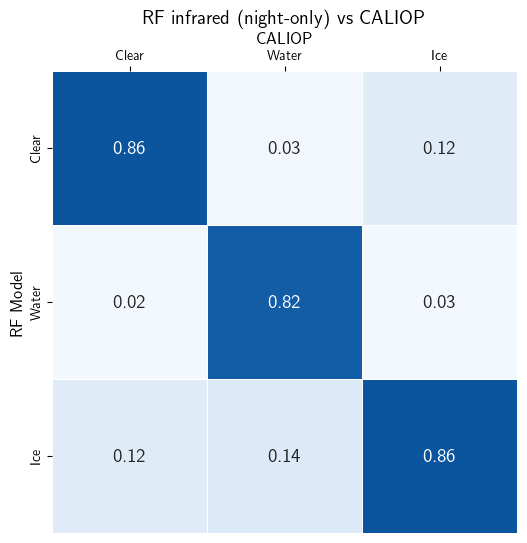

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.0s finished


Fitting RF optical (day-only)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.2min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Fit complete, test score: 0.8905660377358491


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    4.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s


Training score: 0.9875288969016706
OOB score: 0.9107103912531441
do_svd = False


[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.8s finished


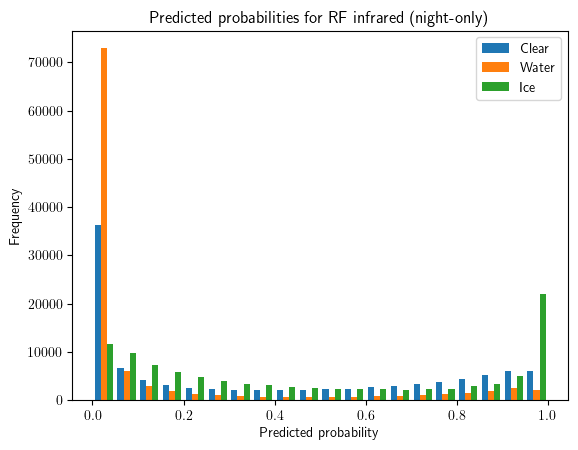

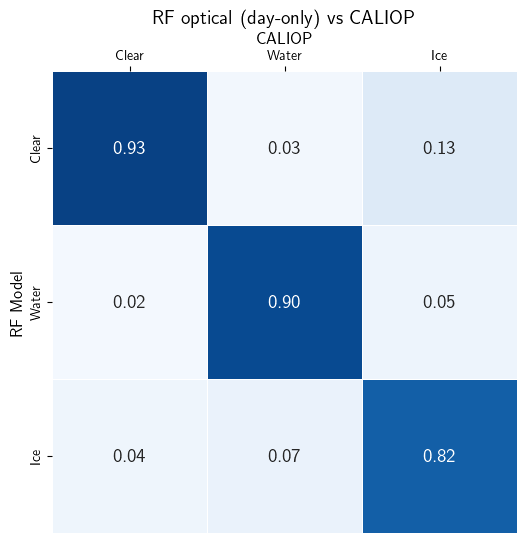

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.7s finished


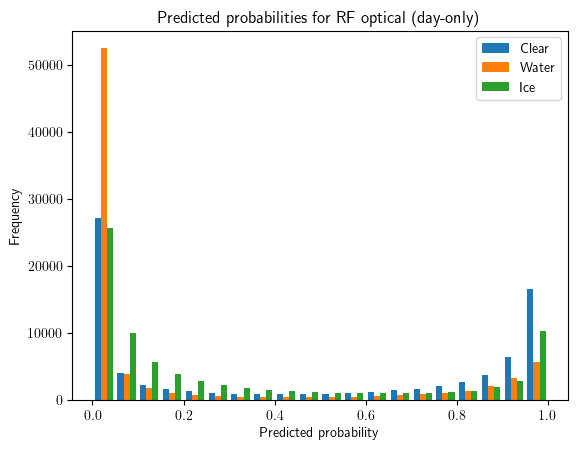

In [10]:
runs_and_time = pd.read_csv(training_log_folder + "runs_and_time.csv")

# current run number is the last number in the run file + 1
current_run_number = runs_and_time.run.max() + 1

# get current time and date and append it to the runs_and_time dataframe
current_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
runs_and_time = pd.concat([runs_and_time, pd.DataFrame([[current_run_number, current_time]], columns=["run", "time"])])

estimators = [0] * len(model_names)
scores = [0] * len(model_names)

do_svd = False

record_run = True

if record_run:
    with open(os.path.join(training_log_folder, "training_logs.md"), mode="a") as f:
        f.write(f"# Run {current_run_number}, {current_time}\n")

# iterate over classifiers
i = 0
for name, clf in zip(model_names, classifiers):
    # split into training and test sets
    X_train, X_test = test_train_split_day_batches(feature_dataframes[i], test_size=0.1)
    X_train, _ =  test_train_split_day_batches(X_train, test_size=0.2)
    X_train, X_test = X_train[features_to_use[i]].values, X_test[features_to_use[i]].values
    y_train, y_test = test_train_split_day_batches(label_arrays[i], test_size=0.1)
    y_train, _ =  test_train_split_day_batches(y_train, test_size=0.2)
    y_train, y_test = y_train["class"].values, y_test["class"].values

    # # scale the non-boolean columns to have a mean of 0 and a standard deviation of 1
    # for col_id, column in enumerate(X.T):
    #     if not (column.max() == 1 and column.min() == 0):
    #         X.T[col_id] = (column - column.mean()) / column.std()

    # remove the rows with nan values, there are very few of them
    nan_rows = np.isnan(X_train).any(axis=1)
    X_train = X_train[~nan_rows]
    y_train = y_train[~nan_rows]

    nan_rows = np.isnan(X_test).any(axis=1)
    X_test = X_test[~nan_rows]
    y_test = y_test[~nan_rows]

    print(f"Fitting {name}")
    estimators[i] = clf.fit(X_train, y_train)
    scores[i] = clf.score(X_test, y_test)
    
    print(f"Fit complete, test score: {scores[i]}")
    print(f"Training score: {clf.score(X_train, y_train)}")
    print(f"OOB score: {clf.oob_score_}")
    print(f"{do_svd = }")
    
    if record_run:
        with open(os.path.join(training_log_folder, "training_logs.md"), mode="a") as f:
            f.write(f"Training on {len(X_train)} datapoints, on the following {len(X_train.T)} features:\n")
            f.write(f"{', '.join(features_to_use[i])}\n\n")
            f.write(f"The training parameters for {name} are:\n")
            params = clf.get_params()
            for key, value in params.items():
                f.write('%s: %s; ' % (key, value))
            f.write("\n\n")
            f.write("Test accuracy:\n")
            f.write(f"{name}: {scores[i]:.4g}\n\n")
            f.write("OOB score:\n")
            f.write(f"{name}: {clf.oob_score_}\n\n")
            f.write(f"{do_svd = }\n\n")

            predicted_classes = clf.predict(X_test)
            confusion_table = easy_confusion(predicted_classes, y_test, title=f"{name} vs CALIOP", save=True, save_path=os.path.join(training_log_folder, f"confusion_matrix_{name}_run_{current_run_number}.png"))

            # get predicted probabilities
            predicted_probabilities = clf.predict_proba(X_test)

            # plot a histogram of the predicted probabilities
            fig, ax = plt.subplots()
            ax.hist(predicted_probabilities, bins=20, label=["Clear", "Water", "Ice"])
            ax.set_xlabel("Predicted probability")
            ax.set_ylabel("Frequency")
            ax.set_title(f"Predicted probabilities for {name}")
            ax.legend()

            f.write("Confusion matrices:\n")
            f.write(confusion_table.to_string())
            f.write("\n\n")
            f.write(f"Comments: {comments}")
            f.write("---\n\n")
    i += 1
 
# write the run number and time to the runs_and_time file
runs_and_time.to_csv(training_log_folder + "runs_and_time.csv", index=False)

### Create undetermined category based on predicted probabilities

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.0s finished


Number of total classifications: 102167
Number of weak classifications: 2902
(102167, 3)
2902


NameError: name 'plot_confusion_matrix_modis_caliop' is not defined

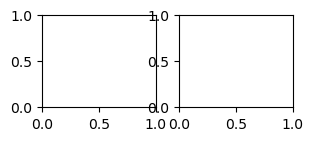

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# clf = estimators[1]

predicted_classes = clf.predict(X_test)
predicted_probabilities = clf.predict_proba(X_test)

confident_prediction_threshold = 0.5
predicted_classes_mask = np.zeros((len(predicted_classes), 4))

for index, datapoint in enumerate(predicted_classes):
    predicted_classes_mask[index, 0] = 1 if datapoint == 0 else 0
    predicted_classes_mask[index, 1] = 1 if datapoint == 1 else 0
    predicted_classes_mask[index, 2] = 1 if datapoint == 2 else 0

indices_of_weak_classifications = []

reclassification_mask = predicted_classes_mask.copy()

for index, mask in enumerate(predicted_classes_mask):
    if sum(mask[:-1] * predicted_probabilities[index]) < confident_prediction_threshold:
        indices_of_weak_classifications.append(index)
        reclassification_mask[index] = [0,0,0,1]

print(f"Number of total classifications: {len(predicted_classes)}")
print(f"Number of weak classifications: {len(indices_of_weak_classifications)}")

print(predicted_probabilities.shape)
# sns.heatmap(predicted_probabilities[-9:, :], annot=True, fmt=".2f")

# plt.matshow(predicted_classes_mask[-9:, :-1], cmap="Greys")
# plt.matshow(reclassification_mask[-9:, :], cmap="Greys")

reclassified_classes = np.where(reclassification_mask[:, 1], 1, 0) +\
                        np.where(reclassification_mask[:, 2], 2, 0) +\
                        np.where(reclassification_mask[:, 3], 3, 0)

print(sum(reclassified_classes == 3))

fig, ax = plt.subplots(1, 2, figsize=(3.24, 1.2))
plot_confusion_matrix_modis_caliop(ax[0], y_test, reclassified_classes, save=False, save_path=f"reclassified_confusion_matrix_{name}_run_{current_run_number}.png")


### Plot the first decision tree

In [18]:
from sklearn.tree import plot_tree

# plot the first tree of the first model
fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(estimators[0].estimators_[0], ax=ax, feature_names=features_to_use[0], class_names=["clear", "water", "ice"], fontsize=8)
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x1412c0680> (for post_execute):


KeyboardInterrupt: 

### Save models

In [11]:
from joblib import dump, load

# save the models
for i, name in enumerate(model_names):
    dump(estimators[i], f"./2013_2017_DATA/trained_models/{name}_run_{current_run_number}.joblib", compress=2)

### Load models and plot the first decision tree in the forest

In [9]:
from sklearn.tree import plot_tree
from joblib import dump, load

# load the model
clf = load("./2013_2017_DATA/trained_models/RF infrared (night-only)_run_57.joblib")


In [4]:
from sklearn.tree import plot_tree
from joblib import dump, load

clf = load("./2013_2017_DATA/trained_models/RF optical (day-only)_run_57.joblib")

KeyboardInterrupt: 

In [10]:
import matplotlib.pyplot as plt

i=0
X_train, X_test = test_train_split_day_batches(feature_dataframes[i], 0.1)
X_train, X_test = X_train[features_to_use[i]].values, X_test[features_to_use[i]].values
y_train, y_test = test_train_split_day_batches(label_arrays[i], 0.1)
y_train, y_test = y_train["class"].values, y_test["class"].values

# # plot histogram of the tree depths
# tree_depths = [estimator.get_depth() for estimator in clf.estimators_]
# plt.hist(tree_depths, bins=20)

# # plot the first tree
# plt.figure(figsize=(20, 10))
# plot_tree(
#         clf.estimators_[i],
#         max_depth=4,
#         feature_names=features_to_use[i],
#         class_names=["clear", "water", "ice"],
#         fontsize=8, 
#         impurity=False,
#         filled=True
# )
# plt.show()

# import dtreeviz # remember to load the package

# # plot the first tree
# viz = dtreeviz.model(
#         clf.estimators_[0],
#         X_train,
#         y_train,
#         # max_depth=4,
#         target_name='class',
#         feature_names=features_to_use[i],
#         class_names=["clear", "water", "ice"]
# )



In [35]:
x = X_train[10, :]
v = viz.view(
        x=x,
        depth_range_to_display=[0,8],
        orientation="LR", fancy=False)
v.save(f"{model_names[i]}_first_tree_complete_not_fancy.svg")

## Visualize feature space

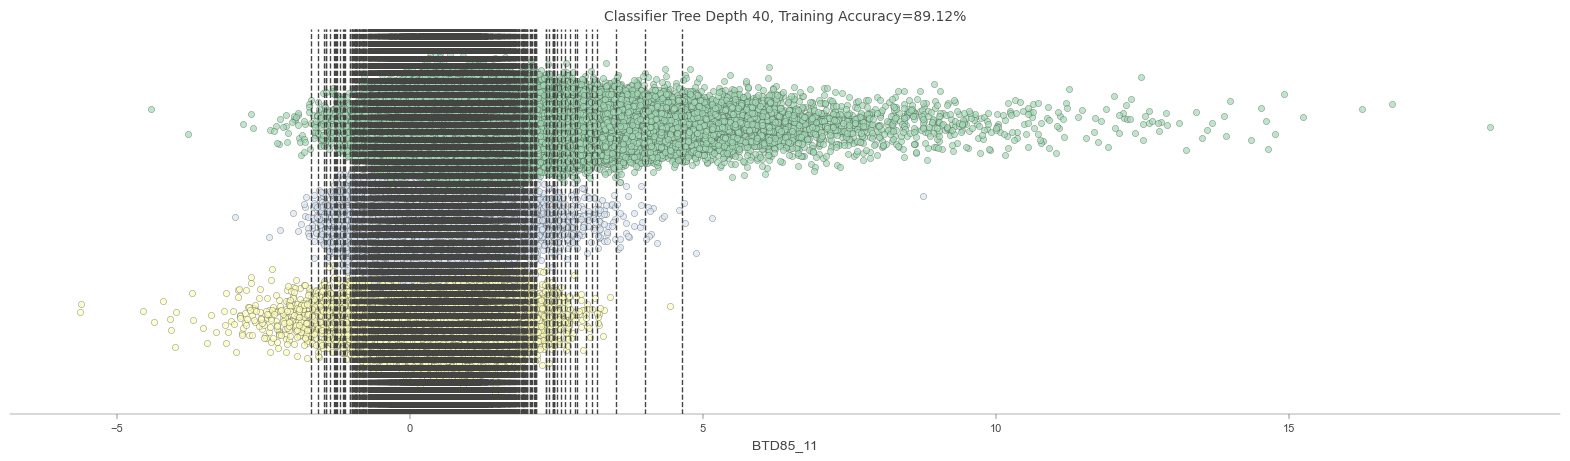

In [30]:
viz.ctree_feature_space(show={'title', 'splits'}, features=['BTD85_11'],
                             figsize=(20,5 ),
                             gtype='strip'
                             )

# Check out infrared model training results from Jasmin

In [23]:
import pandas as pd

training_results = pd.read_csv("./2013_2017_DATA/training_results.csv")
display(training_results.head())

print(training_results["Feature subset"].unique())

,Model,Feature subset,Max depth,Number of trees,OOB score,Computation time
0,Infrared model,"Infrared radiances, geolocation, cloud top pro...",50,500,0.9006,8min 24s
1,Infrared model,"Infrared radiances, geolocation, cloud top pro...",100,500,0.9006,7min 55s
2,Infrared model,"Infrared radiances, geolocation, cloud top pro...",100,200,0.8993,3min 16s
3,Infrared model,"Infrared radiances, geolocation, cloud top pro...",50,200,0.8992,3min 6s
4,Infrared model,"Infrared radiances, geolocation and cloud top ...",50,500,0.8983,8min 15s


['Infrared radiances, geolocation, cloud top properties and surface temperatures'
 'Infrared radiances, geolocation and cloud top properties'
 'Infrared radiances, geolocation and surface temperatures' 'All features'
 'Infrared radiances and geolocation'
 'Infrared radiances, cloud top properties and surface temperatures'
 'Infrared radiances and surface temperatures'
 'Brightness temperatures, geolocation, cloud top properties and surface temperatures'
 'Infrared radiances and cloud top properties'
 'Infrared radiances and brightness temperatures'
 'Brightness temperatures, geolocation and cloud top properties'
 'Infrared radiances only'
 'Brightness temperatures, geolocation and surface temperatures'
 'Brightness temperatures, cloud top properties and surface temperatures'
 'Brightness temperatures and geolocation'
 'Brightness temperatures and cloud top properties'
 'Brightness temperatures and surface temperatures'
 'Brightness temperatures only']


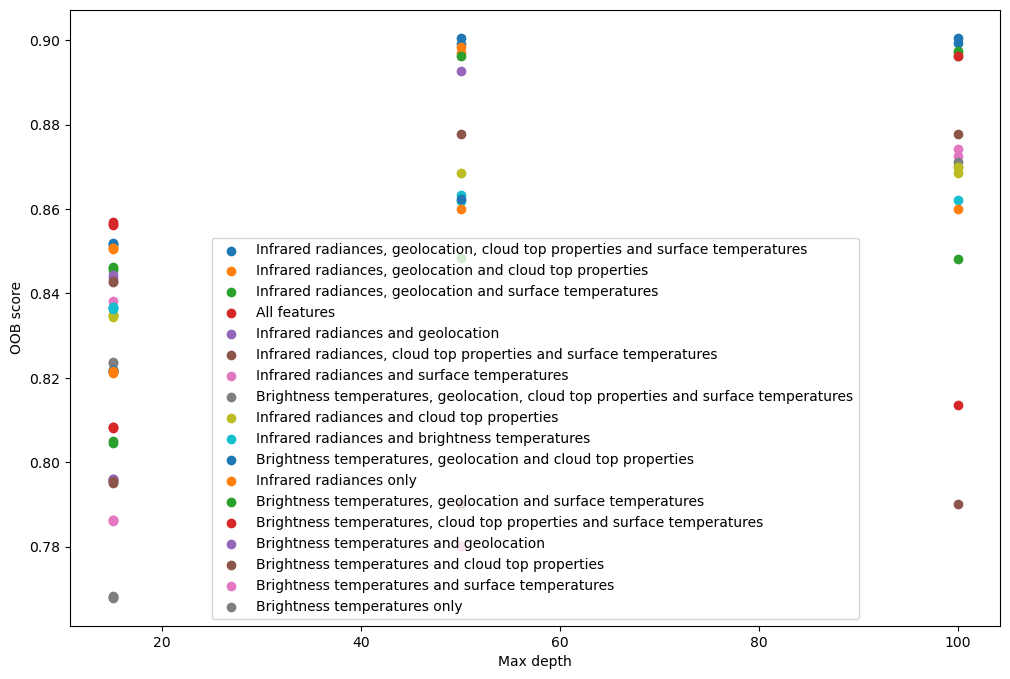

In [25]:
import matplotlib.pyplot as plt

# plot OOB score vs max depth, giving a different color for each feature subset
fig, ax = plt.subplots(figsize=(12, 8))
for feature_subset in training_results["Feature subset"].unique():
    subset = training_results[training_results["Feature subset"] == feature_subset]
    ax.scatter(subset["Max depth"], subset["OOB score"], label=feature_subset)
ax.set_xlabel("Max depth")
ax.set_ylabel("OOB score")
ax.legend()
plt.show()


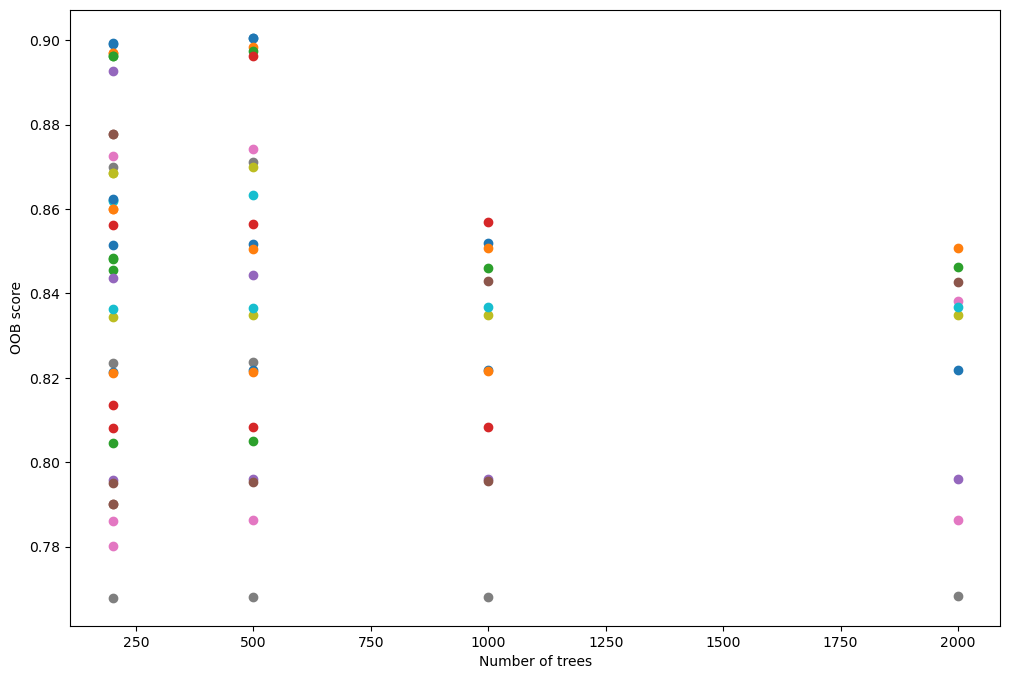

In [28]:
# now do the same but OOB score vs n_estimators
fig, ax = plt.subplots(figsize=(12, 8))
for feature_subset in training_results["Feature subset"].unique():
    subset = training_results[training_results["Feature subset"] == feature_subset]
    ax.scatter(subset["Number of trees"], subset["OOB score"], label=feature_subset)
ax.set_xlabel("Number of trees")
ax.set_ylabel("OOB score")
# ax.legend()
plt.show()


# Evaluate MYD06 cloud-phase classification algorithm

## Read in data

In [1]:
import pandas as pd

folder = "./2013_2017_DATA/"

clean_infrared_features = pd.read_csv(folder + "clean_infrared_features.csv")
clean_optical_features = pd.read_csv(folder + "clean_optical_features.csv")

# read labels now
clean_infrared_labels = pd.read_csv(folder + "clean_infrared_labels.csv")
clean_optical_labels = pd.read_csv(folder + "clean_optical_labels.csv")

# print the heads of the dataframes
# print("Clean infrared features", clean_infrared_features.shape)
# display(clean_infrared_features.head())
# print("Clean optical features", clean_optical_features.shape)
# display(clean_optical_features.head())
# print("Clean infrared labels", clean_infrared_labels.shape)
# display(clean_infrared_labels.head())
# print("Clean optical labels", clean_optical_labels.shape)
# display(clean_optical_labels.head())

# print the number of nan values in each column of clean_optical_features
# print(clean_infrared_features.isna().sum())

## Plotting function

Total number of infrared MODIS classifications: 992561
Number of undetermined classifications: 206738
accuracy_infrared = 52.06%
Total number of optical MODIS classifications: 769366
Number of undetermined classifications: 30202
accuracy_optical = 71.22%
Infrared total 992561
Infrared clear 363019
Infrared water 135745
Infrared ice 493797
Optical total 769366
Optical clear 361853
Optical water 159461
Optical ice 248052


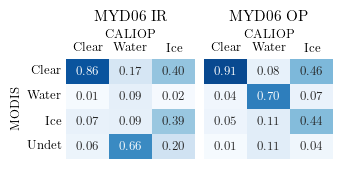

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 9
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern'

def plot_confusion_matrix_modis_caliop(ax, caliop_labels, modis_labels, title="MODIS vs CALIOP", plot_ylabel=True, save=False, save_path=None):
    confusion_table = pd.crosstab(caliop_labels, modis_labels, rownames=["Caliop"], colnames=["Model"])

    # get accuracy score
    accuracy = np.trace(confusion_table) / np.sum(confusion_table.values)

    confusion_table = pd.crosstab(caliop_labels, modis_labels, rownames=["Caliop"], colnames=["Model"], normalize="index")
    if plot_ylabel:
        confusion_table.columns = ["Clear", "Water", "Ice", "Undet"]
    else:
        confusion_table.columns = ["", "", "", ""]
    confusion_table.index = ["Clear", "Water", "Ice"]

    # fig, ax = plt.subplots(figsize=(6, 6))

    # Plot correlation matrix
    h = sns.heatmap(confusion_table.T, cmap="Blues", annot=True, fmt=".2f", ax=ax, cbar=False, vmin=0, vmax=1,
                    # annot_kws={"fontsize":9}
                    )

    # Set plot labels
    ax.set_title("Confusion Matrix")
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.xaxis.tick_top()  # Place x-axis labels on top
    ax.set_title(title, fontsize=11)
    ax.set_xlabel("CALIOP")
    ax.xaxis.set_label_position('top')
    ax.set_ylabel("MODIS")

    # remove x and y label ticks, but not the labels themselves
    ax.tick_params(axis=u'both', which=u'both',length=0)

    if not plot_ylabel:
        ax.set_ylabel("")

    if save:
        h.figure.savefig(save_path, bbox_inches="tight", dpi=300)
    
    return confusion_table, accuracy*100

infrared_modis_classifications = np.where(clean_infrared_features.mWater.values, 1, 0) +\
    np.where(clean_infrared_features.mIce.values, 2, 0) +\
    np.where(clean_infrared_features.mUndetermined.values, 3, 0)

# print the total number of infrared modis classifications and then the undetermined classifications
print(f"Total number of infrared MODIS classifications: {len(infrared_modis_classifications)}")
print(f"Number of undetermined classifications: {sum(infrared_modis_classifications == 3)}")

fig, ax = plt.subplots(1, 2, figsize=(3.45, 1.3))

confusion_matrix_infrared, accuracy_infrared = plot_confusion_matrix_modis_caliop(ax[0], clean_infrared_labels["class"].values, infrared_modis_classifications, title="MYD06 IR", save=False, save_path="./2013_2017_DATA/modis_infrared_vs_caliop.png")

# reduce values in the confusion matrix to two significant figures
confusion_matrix_infrared = confusion_matrix_infrared.round(2)
# save confusion table to csv
confusion_matrix_infrared.T.to_csv("./2013_2017_DATA/confusion_matrix_infrared.csv")


print(f"{accuracy_infrared = :.4g}%")

optical_modis_classifications = np.where(clean_optical_features.mWater.values, 1, 0) +\
    np.where(clean_optical_features.mIce.values, 2, 0) +\
    np.where(clean_optical_features.mUndetermined.values, 3, 0)

# print the total number of optical modis classifications and then the undetermined classifications
print(f"Total number of optical MODIS classifications: {len(optical_modis_classifications)}")
print(f"Number of undetermined classifications: {sum(optical_modis_classifications == 3)}")

confusion_matrix_optical, accuracy_optical = plot_confusion_matrix_modis_caliop(ax[1], clean_optical_labels["class"].values, optical_modis_classifications, title="MYD06 OP", plot_ylabel=False, save=False, save_path="./2013_2017_DATA/modis_optical_vs_caliop.png")

confusion_matrix_optical = confusion_matrix_optical.round(2)
# save confusion table to csv
confusion_matrix_optical.T.to_csv("./2013_2017_DATA/confusion_matrix_optical.csv")
print(f"{accuracy_optical = :.4g}%")

plt.subplots_adjust(wspace=.07, hspace=0)

fig.savefig("./2013_2017_DATA/modis_vs_caliop.pdf", bbox_inches="tight", dpi=300)

# print the number of clear, water and ice pixels in the CALIOP profiles for infrared and optical
print("Infrared total", len(clean_infrared_labels))
print("Infrared clear", sum(clean_infrared_labels["class"] == 0))
print("Infrared water", sum(clean_infrared_labels["class"] == 1))
print("Infrared ice", sum(clean_infrared_labels["class"] == 2))
print("Optical total", len(clean_optical_labels))
print("Optical clear", sum(clean_optical_labels["class"] == 0))
print("Optical water", sum(clean_optical_labels["class"] == 1))
print("Optical ice", sum(clean_optical_labels["class"] == 2))



## Plot location of all datapoints

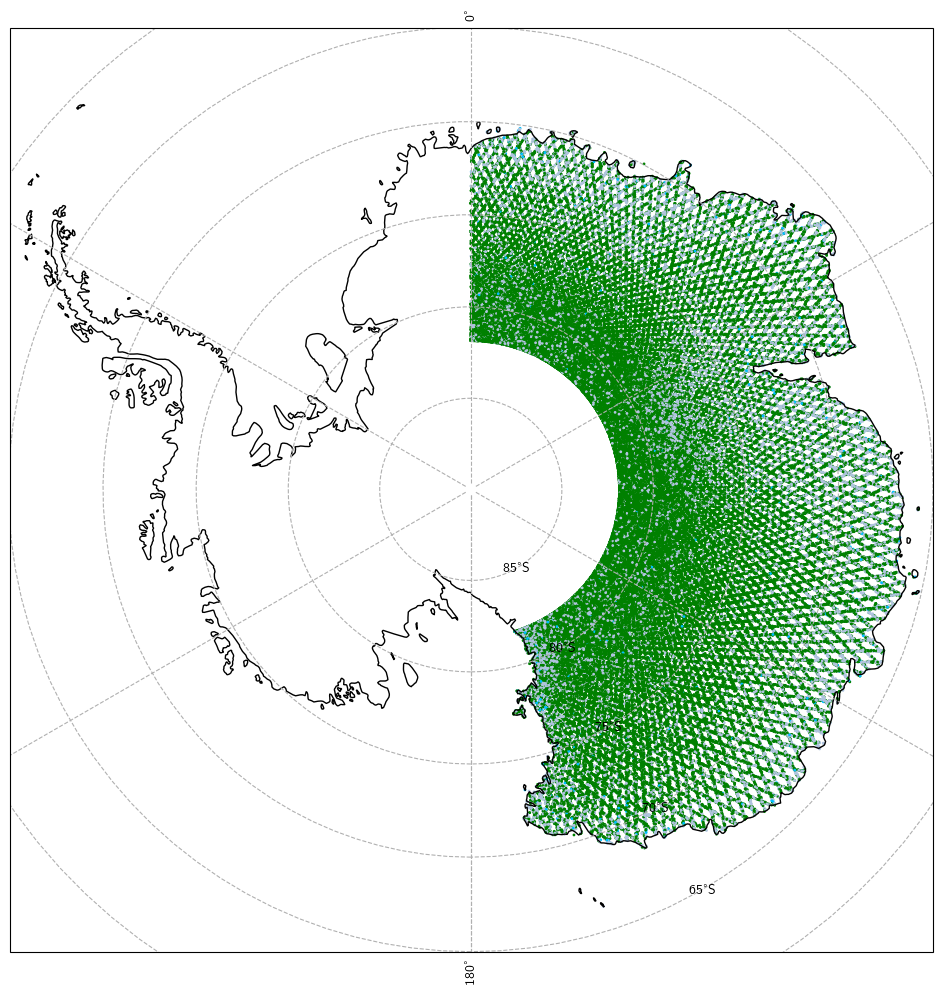

In [22]:
import matplotlib.pyplot as plt
from cartopy import crs as ccrs

longitudes = clean_infrared_features.mLong.values[::50]
latitudes = clean_infrared_features.mLat.values[::50]
classification = infrared_modis_classifications[::50]

modis_phase_colormap = ListedColormap(['green', 'deepskyblue', 'lightsteelblue'])

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': ccrs.SouthPolarStereo()})
ax.coastlines()
ax.set_extent([-180, 180, -90, -65], ccrs.PlateCarree())
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle="dashed")
ax.scatter(longitudes, latitudes, c=classification, cmap=modis_phase_colormap, s=1, transform=ccrs.PlateCarree())



# Use sequential feature selection

## Load data

In [4]:
import pandas as pd

folder = "./2013_2017_DATA/"
# folder = "./JASMIN_tests/Antarctica/merged_features/"

clean_infrared_features = pd.read_csv(folder + "clean_infrared_features.csv")
clean_optical_features = pd.read_csv(folder + "clean_optical_features.csv")

# read labels now
clean_infrared_labels = pd.read_csv(folder + "clean_infrared_labels.csv")
clean_optical_labels = pd.read_csv(folder + "clean_optical_labels.csv")

# print the heads of the dataframes
print("Clean infrared features", clean_infrared_features.shape)
display(clean_infrared_features.head())
print("Clean optical features", clean_optical_features.shape)
# display(clean_optical_features.head())
print("Clean infrared labels", clean_infrared_labels.shape)
# display(clean_infrared_labels.head())
print("Clean optical labels", clean_optical_labels.shape)
# display(clean_optical_labels.head())

Clean infrared features (992561, 40)


,profile_id,pixel_id,mFileID,cFileID,mCloudTopTemp,mCloudTopPressure,mLong,mLat,mVZA,mSZA,...,mIce,mUndetermined,mDayPixel,BT11,BT12,BT85,BT73,BTD85_11,BTD73_11,day_of_year
0,41145,51716,A2017032.0500,2017-02-01T04-57-07,211.32,535.0,-23.4371,72.1073,4.95,118.20,...,1,0,0,246.161775,245.913013,247.543539,240.341959,1.381764,-5.819816,32
1,41160,51986,A2017032.0500,2017-02-01T04-57-07,261.63,960.0,-23.5133,72.0684,4.96,118.24,...,0,1,0,249.207810,249.047732,250.160638,242.437142,0.952828,-6.770669,32
2,41190,52526,A2017032.0500,2017-02-01T04-57-07,243.27,495.0,-23.6610,71.9912,4.95,118.32,...,1,0,0,244.699710,243.878522,246.001206,238.564089,1.301495,-6.135622,32
3,41205,52796,A2017032.0500,2017-02-01T04-57-07,211.27,515.0,-23.7333,71.9516,4.95,118.36,...,1,0,0,246.784867,246.410864,247.893094,240.330736,1.108227,-6.454131,32
4,41265,53876,A2017032.0500,2017-02-01T04-57-07,260.25,940.0,-24.0227,71.7951,4.95,118.52,...,0,0,0,248.254220,247.594582,249.710166,240.948733,1.455945,-7.305487,32


Clean optical features (769366, 51)
Clean infrared labels (992561, 3)
Clean optical labels (769366, 3)


## Train infrared model

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.base import clone
from numbers import Integral, Real
import warnings


import os
import numpy as np

def easy_confusion(model_labels, caliop_labels, title="Model vs CALIOP", save=False, save_path=None):
    confusion_table = pd.crosstab(caliop_labels, model_labels, rownames=["Caliop"], colnames=["Model"], normalize="index")

    confusion_table.columns = ["Clear", "Water", "Ice"]
    confusion_table.index = ["Clear", "Water", "Ice"]

    plt.rcParams['text.usetex'] = True
    plt.rcParams['font.serif'] = 'Computer Modern Roman'
    fig, ax = plt.subplots(figsize=(6, 6))

    # Plot correlation matrix
    sns.heatmap(confusion_table.T, cmap="Blues", annot=True, fmt=".2f", linewidths=.5, ax=ax, cbar=False, vmin=0, vmax=1, annot_kws={"size": 14})

    # Set plot labels
    ax.set_title("Confusion Matrix")
    ax.set_yticklabels(ax.get_yticklabels(), rotation=90)
    ax.xaxis.tick_top()  # Place x-axis labels on top
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("CALIOP", fontsize=12)
    ax.xaxis.set_label_position('top')
    ax.set_ylabel("RF Model", fontsize=12)

    # Show the plot
    plt.show()

    if save:
        fig.savefig(save_path, bbox_inches="tight", dpi=300)
    
    return confusion_table

def test_train_split_day_batches(data, test_size=0.2, random_seed=26):
    cycle_day = 20
    testing_days = int(test_size * cycle_day)

    if testing_days == 0:
        testing_days = 1

    datetimes = pd.to_datetime(data["cFileID"].apply(lambda x: x[0:10]), format="%Y-%m-%d")

    # get the earliest date in the dataset
    earliest_date = datetimes.min()
    days_since_earliest_date = (datetimes - earliest_date).dt.days

    # get the unique days list and shuffle them
    unique_days = days_since_earliest_date.unique()
    # np.random.seed(random_seed)
    # np.random.shuffle(unique_days)

    test_data = data[days_since_earliest_date.isin(unique_days[0::cycle_day])]
    for testing_day in range(1, testing_days):
        test_data = pd.concat([test_data, data[days_since_earliest_date.isin(unique_days[testing_day::cycle_day])]], axis=0)

    train_data = data[~data.index.isin(test_data.index)]

    return train_data, test_data

features_to_use = [
    'band_20', 'band_21', 'band_22', 'band_23', 'band_24', 'band_25', 'band_27', 'band_28', 'band_29', 'band_31', 'band_32', 'band_33', 'band_34', 'band_35', 'band_36',
    'BT11', 'BT85', 'BT73', 'BTD85_11', 'BTD73_11', 'BT12',
    #'mLong', 'mLat',
    'mVZA', 'mSZA', #'day_of_year',
    'mCloudTopTemp', 'mCloudTopPressure',
    'mLST_night',
]

train_data, test_data = test_train_split_day_batches(clean_infrared_features, test_size=0.10, random_seed=26)
train_labels, test_labels = test_train_split_day_batches(clean_infrared_labels, test_size=0.10, random_seed=26)

train_data, val_data = test_train_split_day_batches(train_data, test_size=0.20)
train_labels, val_labels = test_train_split_day_batches(train_labels, test_size=0.20)

X_train = train_data[features_to_use]
y_train = train_labels["class"].values

X_val = val_data[features_to_use]
y_val = val_labels["class"].values

X_test = test_data[features_to_use]
y_test = test_labels["class"].values

RFinfrared = RandomForestClassifier(max_depth=20, n_estimators=200, min_samples_leaf=5, max_features="sqrt", oob_score=True, n_jobs=-1, random_state=26, verbose=0, ccp_alpha=0)

class ValidationSequentialFeatureSelector(SequentialFeatureSelector):
    def __init__(self, estimator, validation_data, validation_labels, initial_feature_mask, n_features_to_select, direction, n_jobs, verbose=0):
        super().__init__(estimator, n_features_to_select=n_features_to_select, direction=direction, n_jobs=n_jobs)
        self.validation_data = validation_data
        self.validation_labels = validation_labels
        self.verbose = verbose
        self.initial_feature_mask = initial_feature_mask

    def fit(self, X, y=None):
        """Learn the features to select from X.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Training vectors, where `n_samples` is the number of samples and
            `n_features` is the number of predictors.

        y : array-like of shape (n_samples,), default=None
            Target values. This parameter may be ignored for
            unsupervised learning.

        Returns
        -------
        self : object
            Returns the instance itself.
        """
        self._validate_params()

        # FIXME: to be removed in 1.3
        if self.n_features_to_select in ("warn", None):
            # for backwards compatibility
            warnings.warn(
                "Leaving `n_features_to_select` to "
                "None is deprecated in 1.0 and will become 'auto' "
                "in 1.3. To keep the same behaviour as with None "
                "(i.e. select half of the features) and avoid "
                "this warning, you should manually set "
                "`n_features_to_select='auto'` and set tol=None "
                "when creating an instance.",
                FutureWarning,
            )

        tags = self._get_tags()
        X = self._validate_data(
            X,
            accept_sparse="csc",
            ensure_min_features=2,
            force_all_finite=not tags.get("allow_nan", True),
        )
        n_features = X.shape[1]
        n_initial_features = sum(self.initial_feature_mask)

        # FIXME: to be fixed in 1.3
        error_msg = (
            "n_features_to_select must be either 'auto', 'warn', "
            "None, an integer in [1, n_features - 1] "
            "representing the absolute "
            "number of features, or a float in (0, 1] "
            "representing a percentage of features to "
            f"select. Got {self.n_features_to_select}"
        )
        if self.n_features_to_select in ("warn", None):
            if self.tol is not None:
                raise ValueError("tol is only enabled if `n_features_to_select='auto'`")
            self.n_features_to_select_ = n_features // 2
        elif self.n_features_to_select == "auto":
            if self.tol is not None:
                # With auto feature selection, `n_features_to_select_` will be updated
                # to `support_.sum()` after features are selected.
                self.n_features_to_select_ = n_features - 1
            else:
                self.n_features_to_select_ = n_features // 2
        elif isinstance(self.n_features_to_select, Integral):
            if not 0 < self.n_features_to_select < n_features:
                raise ValueError(error_msg)
            self.n_features_to_select_ = self.n_features_to_select
        elif isinstance(self.n_features_to_select, Real):
            self.n_features_to_select_ = int(n_features * self.n_features_to_select)

        if self.tol is not None and self.tol < 0 and self.direction == "forward":
            raise ValueError("tol must be positive when doing forward selection")

        cloned_estimator = clone(self.estimator)

        # the current mask corresponds to the set of features:
        # - that we have already *selected* if we do forward selection
        # - that we have already *excluded* if we do backward selection
        current_mask = self.initial_feature_mask
        n_iterations = (
            self.n_features_to_select_ - n_initial_features
            if self.n_features_to_select == "auto" or self.direction == "forward"
            else n_initial_features - self.n_features_to_select_
        )

        old_score = -np.inf
        is_auto_select = self.tol is not None and self.n_features_to_select == "auto"
        for _ in range(n_iterations):
            new_feature_idx, new_score = self._get_best_new_feature_score(
                cloned_estimator, X, y, current_mask
            )
            if is_auto_select and ((new_score - old_score) < self.tol):
                break

            old_score = new_score
            current_mask[new_feature_idx] = True

        if self.direction == "backward":
            current_mask = ~current_mask

        self.support_ = current_mask
        self.n_features_to_select_ = self.support_.sum()

        return self

    def _get_best_new_feature_score(self, estimator, X, y, current_mask):
        # Return the best new feature and its score to add to the current_mask,
        # i.e. return the best new feature and its score to add (resp. remove)
        # when doing forward selection (resp. backward selection).
        # Feature will be added if the current score and past score are greater
        # than tol when n_feature is auto,
        candidate_feature_indices = np.flatnonzero(~current_mask)
        scores = {}

        print(f"Currently considering features {self.validation_data.columns[current_mask].values}")

        for feature_idx in candidate_feature_indices:
            candidate_mask = current_mask.copy()
            candidate_mask[feature_idx] = True
            if self.direction == "backward":
                candidate_mask = ~candidate_mask

            X_train = X[:, candidate_mask]
            estimator.fit(X_train, y)
            scores[feature_idx] = estimator.score(self.validation_data.loc[:, candidate_mask].values, self.validation_labels)
            print(f"Score for added feature {self.validation_data.columns[feature_idx]} is {scores[feature_idx]:.4g}") if self.verbose else None

        new_feature_idx = max(scores, key=lambda feature_idx: scores[feature_idx])
        return new_feature_idx, scores[new_feature_idx]

initial_features = ['band_20', 'band_25', 'band_27', 'band_32', 'BTD85_11', 'BTD73_11', 'mSZA', 'mCloudTopTemp', 'mLST_night']

initial_features_mask = X_train.columns.isin(initial_features)

sfs = ValidationSequentialFeatureSelector(RFinfrared, X_val, y_val, initial_features_mask, n_features_to_select=15, direction="forward", n_jobs=-1, verbose=1)

sfs.fit(X_train, y_train)

print(sfs.get_params())


/Users/alexandrudobra/anaconda3/envs/MPhys/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/alexandrudobra/anaconda3/envs/MPhys/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/alexandrudobra/anaconda3/envs/MPhys/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Currently considering features ['band_20' 'band_25' 'band_27' 'band_32' 'BTD85_11' 'BTD73_11' 'mSZA'
 'mCloudTopTemp' 'mLST_night']
Score for added feature band_21 is 0.8295


KeyboardInterrupt: 

# Get feature importances

## Load data

In [ ]:
import pandas as pd

folder = "./2013_2017_DATA/"
# folder = "./JASMIN_tests/Antarctica/merged_features/"

clean_infrared_features = pd.read_csv(folder + "clean_infrared_features.csv")
clean_optical_features = pd.read_csv(folder + "clean_optical_features.csv")

# read labels now
clean_infrared_labels = pd.read_csv(folder + "clean_infrared_labels.csv")
clean_optical_labels = pd.read_csv(folder + "clean_optical_labels.csv")

# print the heads of the dataframes
print("Clean infrared features", clean_infrared_features.shape)
# display(clean_infrared_features.head())
print("Clean optical features", clean_optical_features.shape)
# display(clean_optical_features.head())
print("Clean infrared labels", clean_infrared_labels.shape)
# display(clean_infrared_labels.head())
print("Clean optical labels", clean_optical_labels.shape)
# display(clean_optical_labels.head())

## Train model

In [ ]:
model_type = "infrared"

# Do pairwise plots

## Plot most 5 important infrared features

In [4]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

folder = "./2013_2017_DATA/"
# folder = "./JASMIN_tests/Antarctica/merged_features/"

clean_infrared_features = pd.read_csv(folder + "clean_infrared_features.csv")
clean_infrared_labels = pd.read_csv(folder + "clean_infrared_labels.csv")

infrared_data = pd.concat([clean_infrared_features, clean_infrared_labels], axis=1)

del clean_infrared_features, clean_infrared_labels

subsetting_ratio = 1000
features_to_display = [
    'band_27', 'band_32', 'band_20',
    'BTD85_11', 'BTD73_11',
    # 'BT73',
    #'mSZA', 
    # 'mCloudTopTemp',#'mLST_night',
    'phase'
]

import warnings

# Ignore FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# infrared_data['mCloudTopTemp'] = np.where(infrared_data['mCloudTopTemp'] == -100, np.nan, infrared_data['mCloudTopTemp'])
infrared_data['phase'] = infrared_data['class'].map({0: "clear", 1: "water", 2: "ice"})

7.965479277403206 2.0
7.18 1.65
(3438, 963)
6.876 1.926


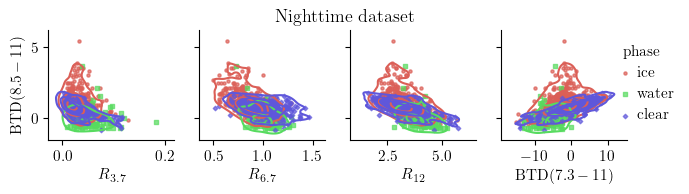

In [9]:


# g = sns.pairplot(infrared_data.loc[::subsetting_ratio, features_to_display], hue='class', diag_kind='kde',
#                  markers=["o", "s", "D"], plot_kws={'alpha':0.8}, corner=False)
# g.map_lower(sns.kdeplot, levels=4, color=".2")

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['text.latex.preamble'] = r'\usepackage{siunitx}'

x_vars = ['band_20', 'band_27', 'band_32', 'BTD73_11']
y_vars = ['BTD85_11']
g = sns.PairGrid(infrared_data.loc[::subsetting_ratio, features_to_display], hue='phase',
                 hue_order=["ice", "water", 'clear'],
                 hue_kws={"marker": ['o', 's', "D"]},
                 x_vars=x_vars, y_vars=y_vars, height=2, aspect=0.9, palette="hls", despine=True)
g.map_offdiag(sns.kdeplot, levels=4, fill=False)
g.map_offdiag(plt.scatter, alpha=0.7, s=5)
g.map_diag(sns.kdeplot, fill=True)
g.add_legend(bbox_to_anchor=(0.85, 0.6), loc='center left', handletextpad=-0.2)

# radiance units: W m^{-2} sr^{-1} \mu m^{-1}


custom_labels = {
    'band_20': r'$R_{3.7}$',
    'band_27': r'$R_{6.7}$',
    'band_32': r'$R_{12}$',
    'BTD73_11': 'BTD($7.3-11$)',
    'BTD85_11': 'BTD($8.5-11$)'}

# Set the labels
for ax, column in zip(g.axes.flatten(), x_vars):
    ax.set_xlabel(custom_labels[column])

for ax, row in zip(g.axes.flatten(), y_vars):
    ax.set_ylabel(custom_labels[row])

plt.gcf().suptitle("Nighttime dataset", y=1.05, fontsize=13)

fig_width, fig_height = plt.gcf().get_size_inches()
print(fig_width, fig_height)
plt.gcf().set_size_inches(7.18, 1.65)
g.savefig(
    "./2013_2017_DATA/pairplot_night.pdf",
    dpi=500,
    bbox_inches="tight"
)

g.savefig(
    "./2013_2017_DATA/pairplot_night.png",
    dpi=500,
    bbox_inches="tight"
)

fig_width, fig_height = plt.gcf().get_size_inches()
print(fig_width, fig_height)

# read back the image and print its dimensions in pixels and inches
from PIL import Image

img = Image.open("./2013_2017_DATA/pairplot_day.png")
print(img.size)
print(img.size[0] / 500, img.size[1] / 500)


## Plot 5 most important optical features

In [10]:
clean_optical_features = pd.read_csv(folder + "clean_optical_features.csv")
clean_optical_labels = pd.read_csv(folder + "clean_optical_labels.csv")

optical_data = pd.concat([clean_optical_features, clean_optical_labels], axis=1)

del clean_optical_features, clean_optical_labels

subsetting_ratio = 1000
features_to_display = [
    'band_23', 'band_27', 'band_29', 'band_32', 'ratio_R213_124',
    # 'band_7', 'band_18', 'band_20', 'band_25', 'band_26', 'band_27', 'band_28',
    # 'band_29', 'ratio_R213_124',
    # 'BTD85_11', 'BTD73_11',
    'phase'
]

optical_data['phase'] = optical_data['class'].map({0: "clear", 1: "water", 2: "ice"})

7.0 1.65
(3438, 963)
6.876 1.926


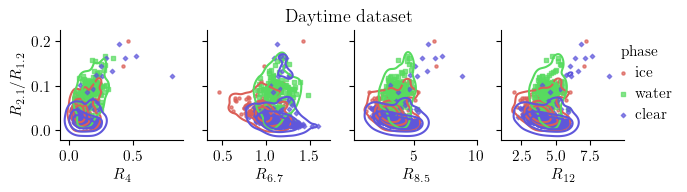

In [11]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['text.latex.preamble'] = r'\usepackage{siunitx}'

# g = sns.pairplot(optical_data.loc[::subsetting_ratio, features_to_display], hue='class', diag_kind='kde', markers=["o", "s", "D"], plot_kws={'alpha':0.8})
# g.map_lower(sns.kdeplot, levels=4, color=".2")

x_vars = ['band_23', 'band_27', 'band_29', 'band_32']
y_vars = ['ratio_R213_124']
g = sns.PairGrid(optical_data.loc[::subsetting_ratio,features_to_display], hue='phase',
                 hue_order=["ice", "water", 'clear'],
                 hue_kws={"marker": ['o', 's', "D"]},
                 x_vars=x_vars, y_vars=y_vars, height=2, aspect=0.9, palette="hls", despine=True)
g.map_offdiag(sns.kdeplot, levels=4, fill=False)
g.map_offdiag(plt.scatter, alpha=0.7, s=5)
g.map_diag(sns.kdeplot, fill=True)
g.add_legend(bbox_to_anchor=(0.85, 0.6), loc='center left', handletextpad=-0.2)

custom_labels = {
    'band_23': r'$R_{4}$',
    'band_27': r'$R_{6.7}$',
    'band_29': r'$R_{8.5}$',
    'band_32': r'$R_{12}$',
    'ratio_R213_124': r'$R_{2.1}/R_{1.2}$'
}

# Set the labels
for ax, column in zip(g.axes.flatten(), x_vars):
    ax.set_xlabel(custom_labels[column])

for ax, row in zip(g.axes.flatten(), y_vars):
    ax.set_ylabel(custom_labels[row])

plt.gcf().suptitle("Daytime dataset", y=1.05, fontsize=13)

plt.gcf().set_size_inches(7, 1.65)

fig_width, fig_height = plt.gcf().get_size_inches()
print(fig_width, fig_height)

g.savefig(
    "./2013_2017_DATA/pairplot_day.pdf",
    dpi=500,
    bbox_inches="tight"
)

g.savefig(
    "./2013_2017_DATA/pairplot_day.png",
    dpi=500,
    bbox_inches="tight"
)

# read back the image and print its dimensions in pixels and inches
from PIL import Image

img = Image.open("./2013_2017_DATA/pairplot_day.png")
print(img.size)
print(img.size[0] / 500, img.size[1] / 500)


# Visualize train, validation, test split

/var/folders/dj/84f9z8ln22g3pqsfd56x81m00000gn/T/ipykernel_53066/4201443989.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['days_since_earliest_date'] = days_since_earliest_date


(1727, 479)
3.454 0.958


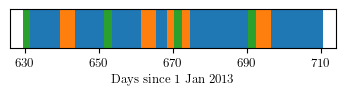

In [13]:
import pandas as pd

folder = "./2013_2017_DATA/"
# folder = "./JASMIN_tests/Antarctica/merged_features/"

# read labels now
clean_infrared_labels = pd.read_csv(folder + "clean_infrared_labels.csv")

def test_train_split_day_batches(data, test_size=0.2, random_seed=26):
    cycle_day = 20
    testing_days = int(test_size * cycle_day)

    if testing_days == 0:
        testing_days = 1

    datetimes = pd.to_datetime(data["cFileID"].apply(lambda x: x[0:10]), format="%Y-%m-%d")

    # get the earliest date in the dataset
    earliest_date = datetimes.min()
    days_since_earliest_date = (datetimes - earliest_date).dt.days
    data['days_since_earliest_date'] = days_since_earliest_date
    # get the unique days list and shuffle them
    unique_days = days_since_earliest_date.unique()
    # np.random.seed(random_seed)
    # np.random.shuffle(unique_days)

    test_data = data[days_since_earliest_date.isin(unique_days[0::cycle_day])]
    for testing_day in range(1, testing_days):
        test_data = pd.concat([test_data, data[days_since_earliest_date.isin(unique_days[testing_day::cycle_day])]], axis=0)

    train_data = data[~data.index.isin(test_data.index)]

    return train_data, test_data


train_labels, test_labels = test_train_split_day_batches(clean_infrared_labels, test_size=0.10, random_seed=26)

train_labels, val_labels = test_train_split_day_batches(train_labels, test_size=0.20)

first_day_to_plot = 630
end_day_to_plot = 711

train_labels = train_labels[(train_labels['days_since_earliest_date'] >= first_day_to_plot) & (train_labels['days_since_earliest_date'] < end_day_to_plot)]
val_labels = val_labels[(val_labels['days_since_earliest_date'] >= first_day_to_plot) & (val_labels['days_since_earliest_date'] < end_day_to_plot)]
test_labels = test_labels[(test_labels['days_since_earliest_date'] >= first_day_to_plot) & (test_labels['days_since_earliest_date'] < end_day_to_plot)]

# plot the three sets with different colors to see if they are distributed evenly
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 9
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern'

marker_size = 5

fig, ax = plt.subplots(figsize=(4, 1))
ax.scatter(
    train_labels['days_since_earliest_date'],
    [0.5] * len(train_labels),
    marker='_',
    s=marker_size, lw=30,
    label="Train",

)
ax.scatter(
    val_labels['days_since_earliest_date'],
    [0.5] * len(val_labels),
    marker='_',
    s=marker_size, lw=30,
    label="Validation",

)
ax.scatter(
    test_labels['days_since_earliest_date'],
    [0.5] * len(test_labels),
    marker='_',
    s=marker_size, lw=30,
    label="Test",

)

ax.set_xlabel("Days since 1 Jan 2013")
ax.set_yticks([])
ax.set_xticks([630, 650, 670, 690, 710])

# column width 3.36533

plt.gcf().set_size_inches(4.2, 0.5)
# lgnd = ax.legend()
# lgnd.legend_handles[0]._linewidths = [10]
# lgnd.legend_handles[1]._linewidths = [10]
# lgnd.legend_handles[2]._linewidths = [10]
plt.savefig("train_val_test_split.png", dpi=500, bbox_inches="tight")
plt.savefig("train_val_test_split.pdf", bbox_inches="tight")

# read back the image and print its dimensions in pixels and inches
from PIL import Image

img = Image.open("train_val_test_split.png")
print(img.size)
print(img.size[0] / 500, img.size[1] / 500)

# Plot hyperparameter grid

/Users/alexandrudobra/anaconda3/envs/MPhys/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/alexandrudobra/anaconda3/envs/MPhys/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Top 5 infrared models


,tree_depth,n_estimator,leaf_min_sample,train_score,val_score,tree_depth_id,leaf_min_sample_id
43,40.0,500,2,0.992089,0.843161,3,1
67,NaN,500,2,0.992124,0.843071,5,1
55,80.0,500,2,0.992124,0.843071,4,1
66,NaN,500,1,1.000000,0.842792,5,0
54,80.0,500,1,1.000000,0.842792,4,0


Top 5 optical models


,tree_depth,n_estimator,leaf_min_sample,train_score,val_score,tree_depth_id,leaf_min_sample_id
67,NaN,500,2,0.988528,0.878963,5,1
42,40.0,500,1,1.000000,0.878963,3,0
55,80.0,500,2,0.988528,0.878956,4,1
43,40.0,500,2,0.988523,0.878884,3,1
36,40.0,300,1,1.000000,0.878848,3,0


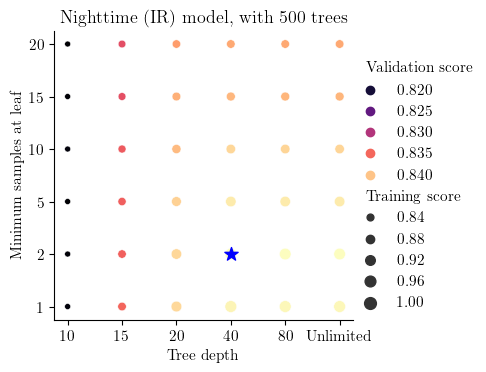

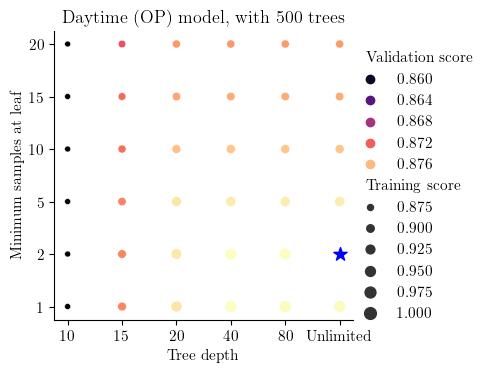

In [10]:
# load csvs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

# Ignore FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

folder = "./2013_2017_DATA/"

infrared_hyperparam_grid = pd.read_csv(folder + "hyperparameter_search14-37.csv")
optical_hyperparam_grid = pd.read_csv(folder + "hyperparameter_search20-43.csv")

def get_unique_params_ids(df):
    unique_tree_depths = df['tree_depth'].unique()
    tree_depth_dict = {depth: i for i, depth in enumerate(unique_tree_depths)}

    unique_leaf_min_samples = df['leaf_min_sample'].unique()
    leaf_min_sample_dict = {depth: i for i, depth in enumerate(unique_leaf_min_samples)}

    df['tree_depth_id'] = df['tree_depth'].map(tree_depth_dict)
    df['leaf_min_sample_id'] = df['leaf_min_sample'].map(leaf_min_sample_dict)

    return df

infrared_hyperparam_grid = get_unique_params_ids(infrared_hyperparam_grid)
optical_hyperparam_grid = get_unique_params_ids(optical_hyperparam_grid)

def plot_hyperparameter_grid(df, title, n_estimators=500, plot_legend=True, plot_ylabels=True, save=False):
    plt.rcParams['text.usetex'] = True
    plt.rcParams['font.size'] = 11
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'Computer Modern'

    df = df.copy()
    df.rename(columns={'val_score': 'Validation score', 'train_score': 'Training score'}, inplace=True)

    # fig, ax = plt.subplots(figsize=(5, 5))

    s = sns.relplot(
        kind='scatter',
        data=df[df.n_estimator == n_estimators],
        x='tree_depth_id',
        y='leaf_min_sample_id',
        hue='Validation score',
        size='Training score',
        palette='magma',
        # legend_out=True,
    )
    s.figure.set_size_inches(3.4, 3.4)
    s.add_legend(loc='center left', bbox_to_anchor=(1.25, 0.5), handletextpad=-0.4)
    ax = s.axes[0, 0]
    ax.set_xticks(range(len(df['tree_depth'].unique())))
    ax.set_yticks(range(len(df['leaf_min_sample'].unique())))
    ax.set_xticklabels(list(df['tree_depth'].dropna().apply(lambda x: str(int(x))).unique()) + ["Unlimited"])
    ax.set_yticklabels(df['leaf_min_sample'].unique())
    ax.set_xlabel("Tree depth")
    ax.set_ylabel("Minimum samples at leaf")
    ax.set_title(title + f", with {n_estimators} trees", fontsize=13)

    # mark the best validation score with a star
    index_of_best_score = df.sort_values(by='Validation score', ascending=False).index[0]
    ax.scatter(df.loc[index_of_best_score, 'tree_depth_id'], df.loc[index_of_best_score, 'leaf_min_sample_id'], marker='*', s=100, c='blue')

    if not plot_legend:
        ax.get_legend().remove()

    if not plot_ylabels:
        ax.set_ylabel("")
        ax.set_yticklabels([])

    if save:
        plt.savefig(f"{title.replace(' ', '_')}_hyperparameter_search.pdf", dpi=500, bbox_inches="tight")

# fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# plt.subplots_adjust(wspace=.5, hspace=0)

plot_hyperparameter_grid(infrared_hyperparam_grid, "Nighttime (IR) model", plot_legend=True, plot_ylabels=True, save=True)
plot_hyperparameter_grid(optical_hyperparam_grid, "Daytime (OP) model", plot_legend=True, plot_ylabels=True, save=True)

# plt.savefig("hyperparameter_grid_scores.pdf", dpi=500, bbox_inches="tight")


# print top the 5 rows with the highest val_score for each dataset
print("Top 5 infrared models")
display(infrared_hyperparam_grid.sort_values(by='val_score', ascending=False).head(5))
print("Top 5 optical models")
display(optical_hyperparam_grid.sort_values(by='val_score', ascending=False).head(5))


# Trying out Neural Net

## Load data

In [2]:
import pandas as pd

# this can be changed
model_type = "infrared"

########################################################################################

def test_train_split_day_batches(data, test_size=0.2, random_seed=26):
    cycle_day = 20
    testing_days = int(test_size * cycle_day)

    if testing_days == 0:
        testing_days = 1

    datetimes = pd.to_datetime(data["cFileID"].apply(lambda x: x[0:10]), format="%Y-%m-%d")

    # get the earliest date in the dataset
    earliest_date = datetimes.min()
    days_since_earliest_date = (datetimes - earliest_date).dt.days

    # get the unique days list and shuffle them
    unique_days = days_since_earliest_date.unique()
    # np.random.seed(random_seed)
    # np.random.shuffle(unique_days)

    test_data = data[days_since_earliest_date.isin(unique_days[0::cycle_day])]
    for testing_day in range(1, testing_days):
        test_data = pd.concat([test_data, data[days_since_earliest_date.isin(unique_days[testing_day::cycle_day])]], axis=0)

    train_data = data[~data.index.isin(test_data.index)]

    return train_data, test_data

data_folder = "./2013_2017_DATA/"

# features = {
#     "infrared": [
#         'band_20', 'band_21', 'band_22', 'band_23', 'band_24', 'band_25', 'band_27', 'band_28', 'band_29', 'band_31', 'band_32', 'band_33', 'band_34', 'band_35', 'band_36',
#         'BT11', 'BT85', 'BT73', 'BTD85_11', 'BTD73_11', 'BT12',
#         #'mLong', 'mLat',
#         'mVZA', 'mSZA', #'day_of_year',
#         #'mCloudTopTemp', 'mCloudTopPressure',
#         'mLST_night',
#     ],
#     "optical": [
#         'band_1', 'band_2', 'band_3', 'band_4', 'band_5', 'band_7', 'band_17', 'band_18', 'band_19',
#         'band_20', 'band_21', 'band_22', 'band_23', 'band_24', 'band_25', 'band_26', 'band_27', 'band_28', 'band_29', 'band_31', 'band_32', 'band_33', 'band_34', 'band_35', 'band_36',
#         'BT11', 'BT85', 'BT73', 'BTD85_11', 'BTD73_11', 'BT12', 'ratio_R213_124',
#         #'mLong', 'mLat',
#         'mVZA', 'mSZA', #'day_of_year',
#         #'mCloudTopTemp', 'mCloudTopPressure',
#         'mLST_day'
#     ]
# }

# second iteration
features = {
    "infrared": [
        'band_20', 'band_22', 'band_23', 'band_25', 'band_27', 'band_28', 'band_29', 'band_31', 'band_32', 'band_33', 'band_34', 'band_35', 'band_36',
        'BT11', 'BT85', 'BT73', 'BTD85_11', 'BTD73_11', 'BT12',
        #'mLong', 'mLat',
        'mVZA', 'mSZA', #'day_of_year',
        #'mCloudTopTemp', 'mCloudTopPressure',
        'mLST_night',
    ],
    "optical": [
        'band_1', 'band_2', 'band_3', 'band_4', 'band_5', 'band_7', 'band_17', 'band_18', 'band_19',
        'band_20', 'band_22', 'band_23', 'band_25', 'band_26', 'band_27', 'band_28', 'band_29', 'band_31', 'band_32', 'band_33', 'band_34', 'band_35', 'band_36',
        'BT11', 'BT85', 'BT73', 'BTD85_11', 'BTD73_11', 'BT12', 'ratio_R213_124',
        #'mLong', 'mLat',
        'mVZA', 'mSZA', #'day_of_year',
        #'mCloudTopTemp', 'mCloudTopPressure',
        'mLST_day'
    ]
}

# load data
data = pd.read_csv(data_folder + f"clean_{model_type}_features.csv")[features[model_type] + ['cFileID']]

# load labels
labels = pd.read_csv(data_folder + f"clean_{model_type}_labels.csv")[['class', 'cFileID']]

# split data
train_data, test_data = test_train_split_day_batches(data, test_size=0.20)
train_labels, test_labels = test_train_split_day_batches(labels, test_size=0.20)

# remove the cFileID column
train_data = train_data.drop(columns=['cFileID'])
test_data = test_data.drop(columns=['cFileID'])

train_labels = train_labels['class'].values
test_labels = test_labels['class'].values

## Create model and split data

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def easy_confusion(model_labels, caliop_labels, title="Model vs CALIOP", save=False, save_path=None):
    confusion_table = pd.crosstab(caliop_labels, model_labels, rownames=["Caliop"], colnames=["Model"], normalize="index")

    confusion_table.columns = ["Clear", "Water", "Ice"]
    confusion_table.index = ["Clear", "Water", "Ice"]

    plt.rcParams['text.usetex'] = True
    plt.rcParams['font.serif'] = 'Computer Modern Roman'
    fig, ax = plt.subplots(figsize=(6, 6))

    # Plot correlation matrix
    sns.heatmap(confusion_table.T, cmap="Blues", annot=True, fmt=".2f", linewidths=.5, ax=ax, cbar=False, vmin=0, vmax=1, annot_kws={"size": 14})

    # Set plot labels
    ax.set_title("Confusion Matrix")
    ax.set_yticklabels(ax.get_yticklabels(), rotation=90)
    ax.xaxis.tick_top()  # Place x-axis labels on top
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("CALIOP", fontsize=12)
    ax.xaxis.set_label_position('top')
    ax.set_ylabel("RF Model", fontsize=12)

    # Show the plot
    plt.show()

    if save:
        fig.savefig(save_path, bbox_inches="tight", dpi=300)
    
    return confusion_table

from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(30, 30, 30, 30), max_iter=500, random_state=26, verbose=False)

Fitting Neural Network model for infrared data


/Users/alexandrudobra/anaconda3/envs/MPhys/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/alexandrudobra/anaconda3/envs/MPhys/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/alexandrudobra/anaconda3/envs/MPhys/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/alexandrudobra/anaconda3/envs/MPhys/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_

Fit complete, training score: 0.808589465783004


/Users/alexandrudobra/anaconda3/envs/MPhys/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/alexandrudobra/anaconda3/envs/MPhys/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/alexandrudobra/anaconda3/envs/MPhys/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Test score: 0.8029763481365941


/Users/alexandrudobra/anaconda3/envs/MPhys/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/alexandrudobra/anaconda3/envs/MPhys/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/alexandrudobra/anaconda3/envs/MPhys/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


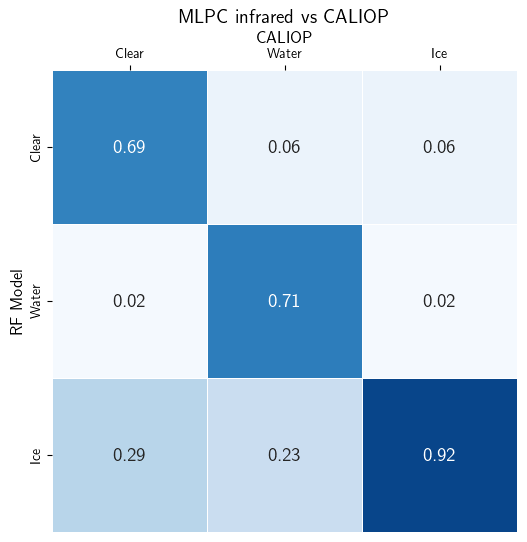

In [4]:
import datetime
import os
import numpy as np

record_run = True
training_log_folder = "./2013_2017_DATA/training_logs/"

runs_and_time = pd.read_csv(training_log_folder + "runs_and_time.csv")

# current run number is the last number in the run file + 1
current_run_number = runs_and_time.run.max() + 1

# get current time and date and append it to the runs_and_time dataframe
current_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
runs_and_time = pd.concat([runs_and_time, pd.DataFrame([[current_run_number, current_time]], columns=["run", "time"])])

print(f"Fitting Neural Network model for {model_type} data")
clf.fit(train_data, train_labels)

train_score = clf.score(train_data, train_labels)
print(f"Fit complete, training score: {clf.score(train_data, train_labels)}")

test_score = clf.score(test_data, test_labels)
print(f"Test score: {test_score}")

predicted_classes = clf.predict(test_data)
confusion_table = easy_confusion(
    predicted_classes,
    test_labels,
    title=f"MLPC {model_type} vs CALIOP"
)

if record_run:
    with open(os.path.join(training_log_folder, "training_logs.md"), mode="a") as f:
        f.write(f"# Run {current_run_number}, {current_time}\n")
        f.write(f"Training on {len(train_data)} datapoints, on the following {len(train_data.T)} features:\n")

        f.write(f"Training on {len(train_data)} datapoints, on the following {len(train_data.T)} features:\n")
        f.write(f"{', '.join(features[model_type])}\n\n")
        f.write(f"The training parameters for MLPC are:\n")
        params = clf.get_params()
        for key, value in params.items():
            f.write('%s: %s; ' % (key, value))
        f.write("\n\n")
        f.write(f"Training accuracy: {train_score}\n")
        f.write(f"Test accuracy: {test_score}\n")
        f.write("Confusion matrices:\n")
        f.write(confusion_table.to_string())
        f.write("\n\n")


# write the run number and time to the runs_and_time file
runs_and_time.to_csv(training_log_folder + "runs_and_time.csv", index=False)

/Users/alexandrudobra/anaconda3/envs/MPhys/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/alexandrudobra/anaconda3/envs/MPhys/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/alexandrudobra/anaconda3/envs/MPhys/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/alexandrudobra/anaconda3/envs/MPhys/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_

Test score on Antarctica data: 0.7757052567173506


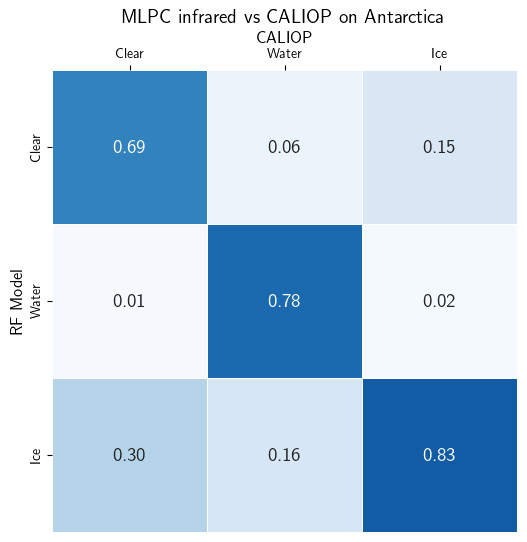

In [26]:
# test now on Antarctica data

antarctica_data_folder = "./JASMIN_tests/Antarctica/merged_features/"

# load data
antarctica_data = pd.read_csv(antarctica_data_folder + f"clean_{model_type}_features.csv")[features[model_type] + ['cFileID']]
antarctica_labels = pd.read_csv(antarctica_data_folder + f"clean_{model_type}_labels.csv")[['class', 'cFileID']]
antarctica_data = antarctica_data.drop(columns=['cFileID'])
antarctica_labels = antarctica_labels['class']#.values

# remove nans
antarctica_data = antarctica_data.dropna()

# resize the labels to match the data
antarctica_labels = antarctica_labels.loc[antarctica_data.index]

print(f"Test score on Antarctica data: {clf.score(antarctica_data, antarctica_labels)}")

predicted_classes = clf.predict(antarctica_data)
confusion_table = easy_confusion(
    predicted_classes,
    antarctica_labels,
    title=f"MLPC {model_type} vs CALIOP on Antarctica"
)



# Plot confusion matrix for final RF models

In [8]:
import pandas as pd
from joblib import load

# this can be changed
model_type = "infrared"

########################################################################################

def test_train_split_day_batches(data, test_size=0.2, random_seed=26):
    cycle_day = 20
    testing_days = int(test_size * cycle_day)

    if testing_days == 0:
        testing_days = 1

    datetimes = pd.to_datetime(data["cFileID"].apply(lambda x: x[0:10]), format="%Y-%m-%d")

    # get the earliest date in the dataset
    earliest_date = datetimes.min()
    days_since_earliest_date = (datetimes - earliest_date).dt.days

    # get the unique days list and shuffle them
    unique_days = days_since_earliest_date.unique()
    # np.random.seed(random_seed)
    # np.random.shuffle(unique_days)

    test_data = data[days_since_earliest_date.isin(unique_days[0::cycle_day])]
    for testing_day in range(1, testing_days):
        test_data = pd.concat([test_data, data[days_since_earliest_date.isin(unique_days[testing_day::cycle_day])]], axis=0)

    train_data = data[~data.index.isin(test_data.index)]

    return train_data, test_data

data_folder = "./2013_2017_DATA/"

features = {
    "infrared": [
        'band_25', 'band_27', 'band_36', 'BTD85_11', 'BTD73_11', 'BT73',
       'BTD12_11', 'BTD39_11', 'mLST_night', 'mSZA'
    ],
    "optical": [
        'band_7', 'band_18', 'band_20', 'band_25', 'band_26', 'band_27',
       'band_28', 'band_29', 'mSZA', 'mCloudTopPressure'
    ]
}

model_save_folder = "./2013_2017_DATA/trained_models/"
model_save_names = {
    "infrared": "RF infrared (night-only)_run_57.joblib",
    "optical": "RF optical (day-only)_run_57.joblib"
}

Clear profiles 363019 0.36573973791031483
Water profiles 135745 0.13676237530993057
Ice profiles 493797 0.4974978867797546


/Users/alexandrudobra/anaconda3/envs/MPhys/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/alexandrudobra/anaconda3/envs/MPhys/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/alexandrudobra/anaconda3/envs/MPhys/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/alexandrudobra/anaconda3/envs/MPhys/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

Number of total classifications: 102167
Number of weak classifications: 2902
(102167, 3)
Clear profiles 361853 0.47032621665111274
Water profiles 159461 0.20726286318865145
Ice profiles 248052 0.3224109201602358


/Users/alexandrudobra/anaconda3/envs/MPhys/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/alexandrudobra/anaconda3/envs/MPhys/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/alexandrudobra/anaconda3/envs/MPhys/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/alexandrudobra/anaconda3/envs/MPhys/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

Number of total classifications: 79235
Number of weak classifications: 1711
(79235, 3)
accuracy_infrared = 83.83%
accuracy_optical = 87.98%


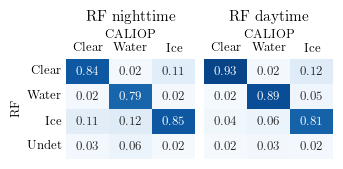

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 9
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern'

def plot_confusion_matrix_modis_caliop(ax, caliop_labels, modis_labels, title="MODIS vs CALIOP", plot_ylabel=True, save=False, save_path=None):
    confusion_table = pd.crosstab(caliop_labels, modis_labels, rownames=["Caliop"], colnames=["RF"])

    # get accuracy score
    accuracy = np.trace(confusion_table) / np.sum(confusion_table.values)

    confusion_table = pd.crosstab(caliop_labels, modis_labels, rownames=["Caliop"], colnames=["RF"], normalize="index")
    if plot_ylabel:
        confusion_table.columns = ["Clear", "Water", "Ice", "Undet"]
    else:
        confusion_table.columns = ["", "", "", ""]
    confusion_table.index = ["Clear", "Water", "Ice"]

    # fig, ax = plt.subplots(figsize=(6, 6))

    # Plot correlation matrix
    h = sns.heatmap(confusion_table.T, cmap="Blues", annot=True, fmt=".2f", ax=ax, cbar=False, vmin=0, vmax=1, 
                    #annot_kws={"fontsize":11}
                    )

    # Set plot labels
    ax.set_title("Confusion Matrix")
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.xaxis.tick_top()  # Place x-axis labels on top
    ax.set_title(title, fontsize=11)
    ax.set_xlabel("CALIOP")
    ax.xaxis.set_label_position('top')
    ax.set_ylabel("RF")

    # remove x and y label ticks, but not the labels themselves
    ax.tick_params(axis=u'both', which=u'both',length=0)

    if not plot_ylabel:
        ax.set_ylabel("")

    if save:
        h.figure.savefig(save_path, bbox_inches="tight", dpi=300)
    
    return confusion_table, accuracy*100

fig, ax = plt.subplots(1, 2, figsize=(3.45, 1.3))

for model_type in ["infrared", "optical"]:
    data = pd.read_csv(data_folder + f"clean_{model_type}_features.csv")[features[model_type] + ['cFileID']]
    labels = pd.read_csv(data_folder + f"clean_{model_type}_labels.csv")[['class', 'cFileID']]

    # print the number of datapoints with each class and the percentage from the total
    total_datapoints = len(labels)
    print("Clear profiles", len(labels[labels['class'] == 0]), len(labels[labels['class'] == 0]) / total_datapoints)
    print("Water profiles", len(labels[labels['class'] == 1]), len(labels[labels['class'] == 1]) / total_datapoints)
    print("Ice profiles", len(labels[labels['class'] == 2]), len(labels[labels['class'] == 2]) / total_datapoints)
    
    # split data
    train_data, test_data = test_train_split_day_batches(data, test_size=0.10)
    train_labels, test_labels = test_train_split_day_batches(labels, test_size=0.10)

    # I only need the test data
    del train_data, train_labels, data, labels

    # remove the cFileID column
    test_data = test_data.drop(columns=['cFileID'])
    test_labels = test_labels['class'].values

    # load model
    clf = load(model_save_folder + model_save_names[model_type])

    # predict the classes
    predicted_classes = clf.predict(test_data)

    # get probabilities
    predicted_probabilities = clf.predict_proba(test_data)

    confident_prediction_threshold = 0.5
    predicted_classes_mask = np.zeros((len(predicted_classes), 4))

    for index, datapoint in enumerate(predicted_classes):
        predicted_classes_mask[index, 0] = 1 if datapoint == 0 else 0
        predicted_classes_mask[index, 1] = 1 if datapoint == 1 else 0
        predicted_classes_mask[index, 2] = 1 if datapoint == 2 else 0

    indices_of_weak_classifications = []

    reclassification_mask = predicted_classes_mask.copy()

    for index, mask in enumerate(predicted_classes_mask):
        if sum(mask[:-1] * predicted_probabilities[index]) < confident_prediction_threshold:
            indices_of_weak_classifications.append(index)
            reclassification_mask[index] = [0,0,0,1]

    print(f"Number of total classifications: {len(predicted_classes)}")
    print(f"Number of weak classifications: {len(indices_of_weak_classifications)}")

    print(predicted_probabilities.shape)
    # sns.heatmap(predicted_probabilities[-9:, :], annot=True, fmt=".2f")

    # plt.matshow(predicted_classes_mask[-9:, :-1], cmap="Greys")
    # plt.matshow(reclassification_mask[-9:, :], cmap="Greys")

    reclassified_classes = np.where(reclassification_mask[:, 1], 1, 0) +\
                            np.where(reclassification_mask[:, 2], 2, 0) +\
                            np.where(reclassification_mask[:, 3], 3, 0)
    if model_type == "infrared":
        confusion_matrix_infrared, accuracy_infrared = plot_confusion_matrix_modis_caliop(
            ax[0],
            test_labels,
            reclassified_classes,
            title="RF nighttime",
            save=False
        )
    else:
        confusion_matrix_optical, accuracy_optical = plot_confusion_matrix_modis_caliop(
            ax[1],
            test_labels,
            reclassified_classes,
            title="RF daytime",
            plot_ylabel=False,
            save=False
        )

print(f"{accuracy_infrared = :.4g}%")
print(f"{accuracy_optical = :.4g}%")

plt.subplots_adjust(wspace=.07, hspace=0)

fig.savefig("./2013_2017_DATA/RF_vs_caliop_reclassified.pdf", bbox_inches="tight", dpi=300)